In [1]:
#from bussilab import maxent
import numpy as np
import warnings; warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

%matplotlib inline

# SI Figure 1

In [2]:
def retransform_Karplus(parameters):
    temp=[]
    for p,param in enumerate(parameters):
        if p in [0,3,6]:
            A=2*param
            temp.append(A)
        if p in [1,4,7]:
            temp.append(param)
        if p in [2,5,8]:
            temp.append(param/np.sqrt(2)-A/2)
    return np.array(temp)


#get average and std of the literature curves
from matplotlib.ticker import FuncFormatter, MultipleLocator
from matplotlib.ticker import MaxNLocator

In [3]:
#load beta

experimental_max_min=np.load('SI_saves/experimental_max_min.npy')

beta_min_coupl=experimental_max_min[0]
beta_max_coupl=experimental_max_min[1]

new_Karplus_parameters_list=np.load('SI_saves/new_Karplus_parameters_list.npy')

params1_beta=np.load('SI_saves/beta_this_study_chi2R.npy')
params2_beta=np.load('SI_saves/beta_this_study_chi2.npy')
params3_beta=np.load('SI_saves/beta_Lankhorst.npy')

s_c_hh_beta=np.load('SI_saves/s_c_hh_beta.npy')

#load gamma

gamma_min_coupl=experimental_max_min[2]
gamma_max_coupl=experimental_max_min[3]

params1_gamma=np.load('SI_saves/gamma_this_study_chi2R.npy')
params2_gamma=np.load('SI_saves/gamma_this_study_chi2.npy')
params3_gamma=np.load('SI_saves/gamma_Davies.npy')

s_c_hh_gamma=np.load('SI_saves/s_c_hh_gamma.npy')

#load sugar

sugar_min_coupl=experimental_max_min[4]
sugar_max_coupl=experimental_max_min[5]

params1_sugar=np.load('SI_saves/sugar_this_study_chi2R.npy')
params2_sugar=np.load('SI_saves/sugar_this_study_chi2.npy')
params3_sugar=np.load('SI_saves/sugar_Condon.npy')

s_c_hh_sugar=np.load('SI_saves/s_c_hh_sugar.npy')

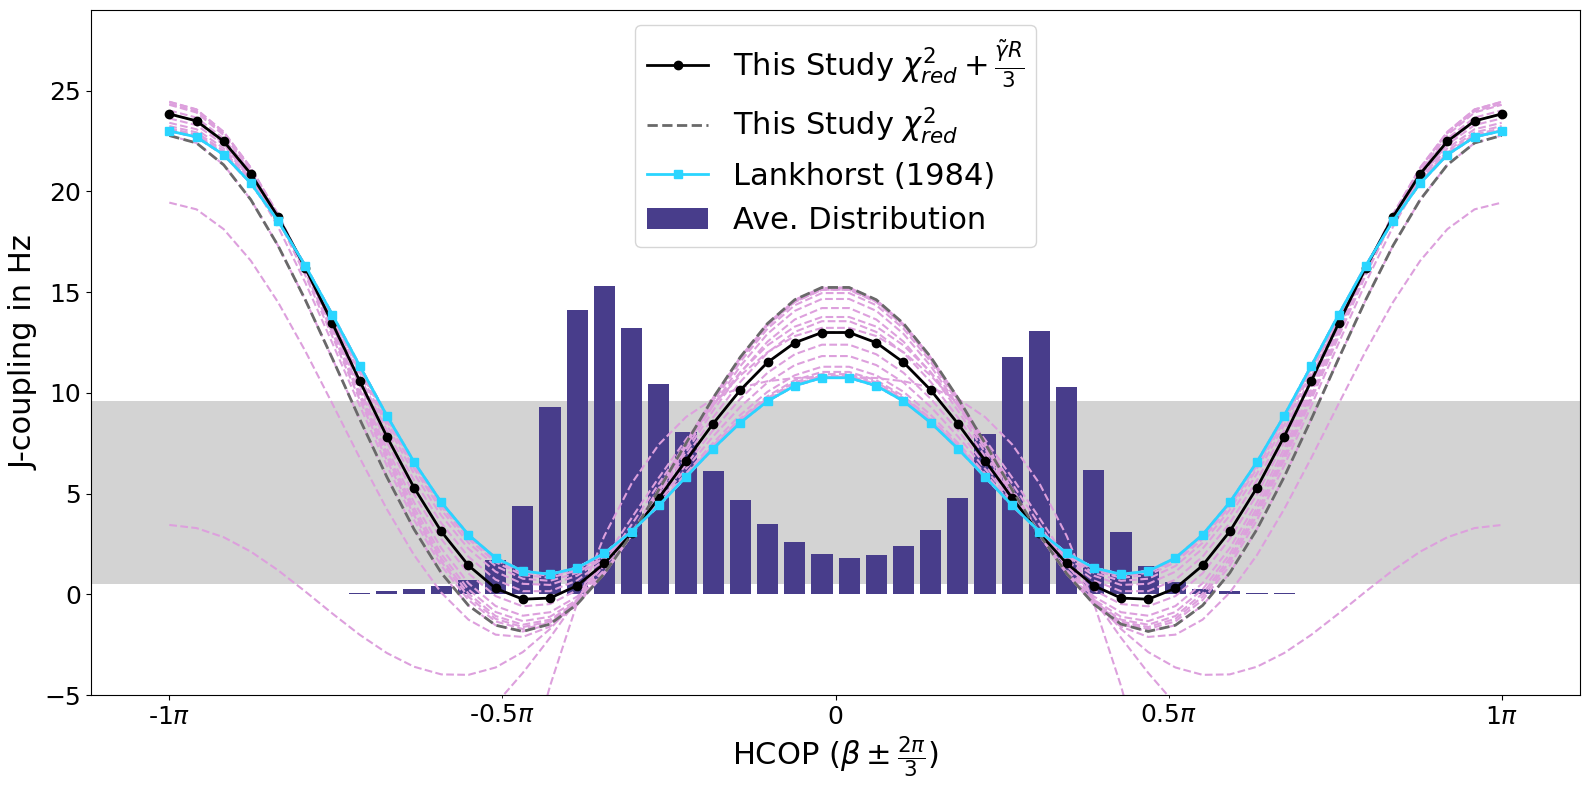

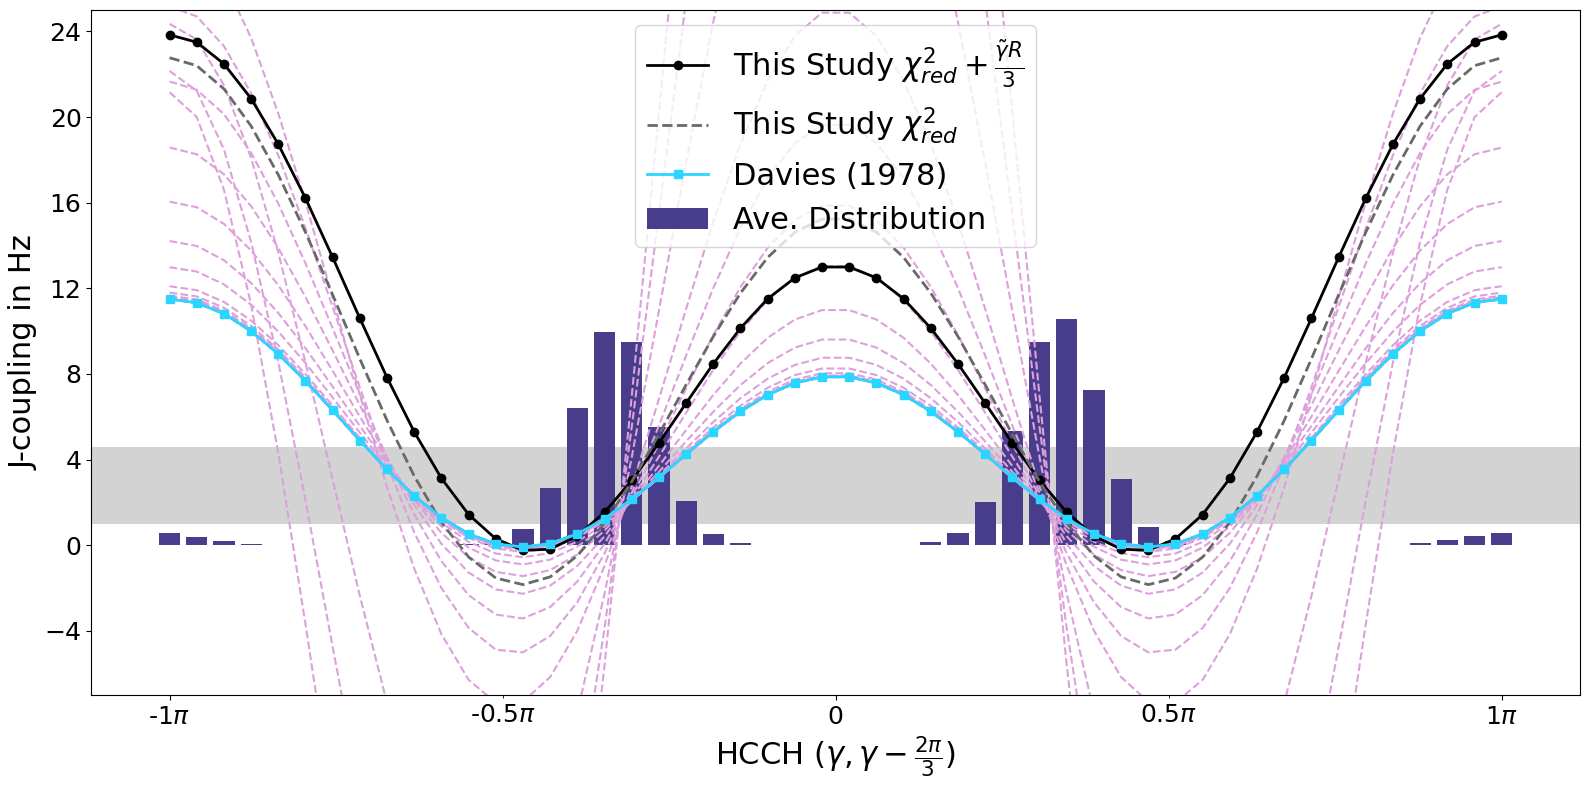

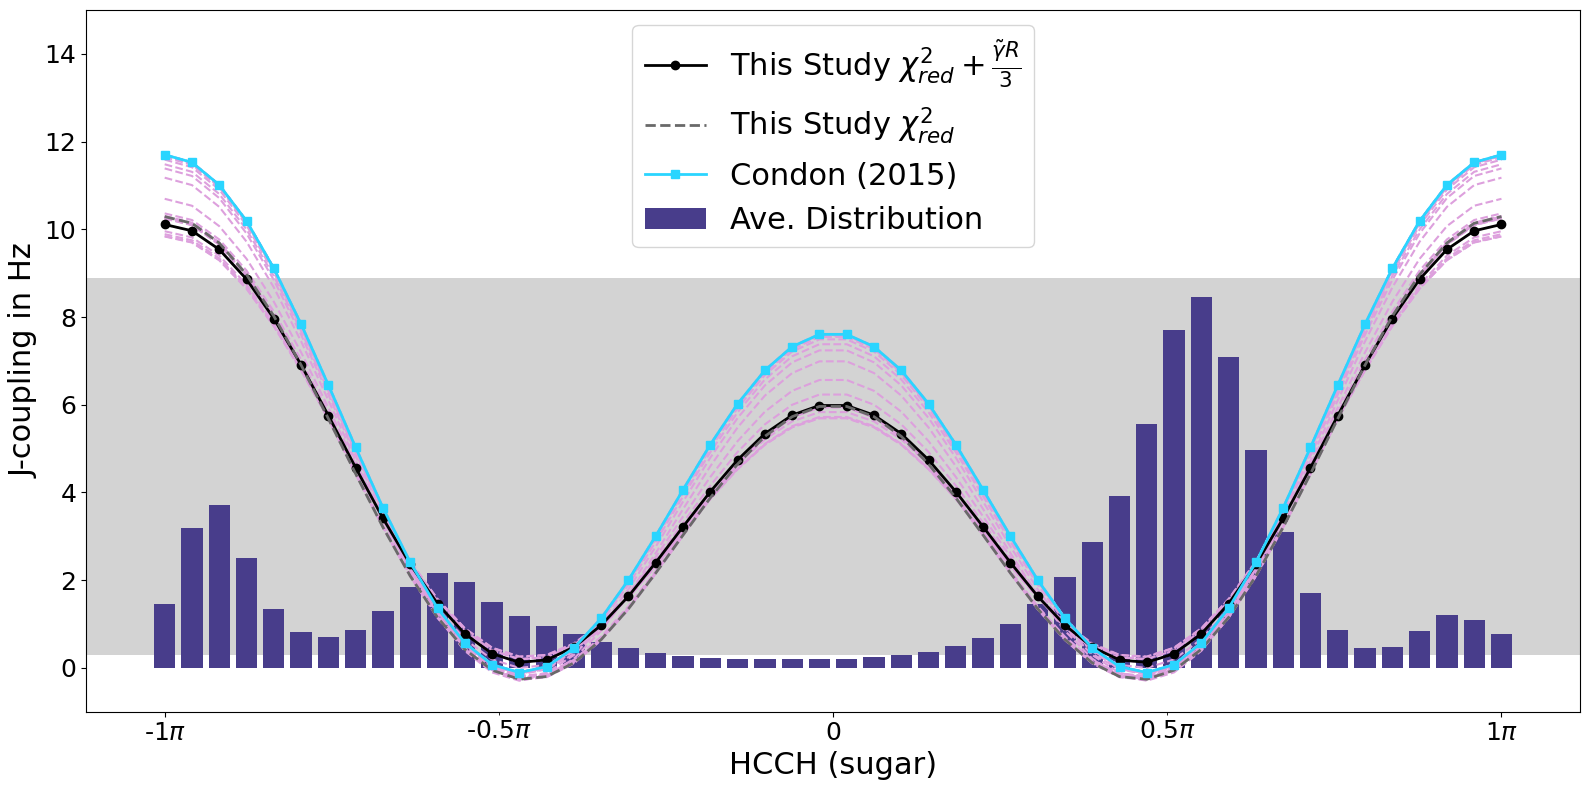

In [4]:
n_curves=29

cmap = plt.cm.get_cmap('cool')
ncomparisons=6
marker_list=['s','^','P','D','*','H','X','v']

x=np.linspace(-np.pi,np.pi)

frame=(16,8)

fig, ax = plt.subplots(figsize=frame)

plt.axhspan(beta_min_coupl, beta_max_coupl, color='darkgray', alpha=0.5, lw=0)

for i in range(n_curves):
    Karplus_parameters_optimized=retransform_Karplus(new_Karplus_parameters_list[i])
    p=1
    karplus_set=Karplus_parameters_optimized[p*3:p*3+3]
    A,B,C=karplus_set[0],karplus_set[1],karplus_set[2]
    jcoupling=A*np.cos(x)**2+B*np.cos(x)+C
    plt.plot(x,jcoupling,'--',color='plum')
    

plt.plot(x,params1_beta,'o-',color='black',linewidth=2,label=r'This Study $\chi_{red}^2+\frac{\tilde{\gamma}R}{3}$')
plt.plot(x,params2_beta,'--',color='dimgrey',linewidth=2,label=r'This Study $\chi_{red}^2$')
plt.plot(x,params3_beta,linewidth=2,color=cmap((0+1)/ncomparisons),marker=marker_list[0],label='Lankhorst (1984)')


plt.bar(x,s_c_hh_beta,width=0.1,color='darkslateblue',label='Ave. Distribution')

plt.ylim(-5,29)  

plt.xlabel(r'HCOP ($\beta \pm \frac{2\pi}{3}$)',fontsize=22)
plt.ylabel('J-coupling in Hz',fontsize=22)
plt.legend(ncol=1,fontsize=22)
plt.yticks(fontsize=18)

ax.tick_params(axis='both', which='both', labelsize=18)

ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax.xaxis.set_minor_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_minor_locator(MultipleLocator(base=np.pi/2))
        
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=frame)

plt.axhspan(gamma_min_coupl, gamma_max_coupl, color='darkgray', alpha=0.5, lw=0) #, label='Exp. range')


for i in range(n_curves):
    Karplus_parameters_optimized=retransform_Karplus(new_Karplus_parameters_list[i])
    p=0
    karplus_set=Karplus_parameters_optimized[p*3:p*3+3]
    A,B,C=karplus_set[0],karplus_set[1],karplus_set[2]
    jcoupling=A*np.cos(x)**2+B*np.cos(x)+C
    plt.plot(x,jcoupling,'--',color='plum')
    
plt.plot(x,params1_gamma,'o-',color='black',linewidth=2,label=r'This Study $\chi_{red}^2+\frac{\tilde{\gamma}R}{3}$')
plt.plot(x,params2_gamma,'--',color='dimgrey',linewidth=2,label=r'This Study $\chi_{red}^2$')
plt.plot(x,params3_gamma,linewidth=2,color=cmap((0+1)/ncomparisons),marker=marker_list[0],label='Davies (1978)')

plt.bar(x,s_c_hh_gamma,width=0.1,color='darkslateblue',label='Ave. Distribution')

              
plt.ylim(-7,25)

plt.xlabel(r'HCCH ($\gamma,\gamma-\frac{2\pi}{3}$)',fontsize=22)
plt.ylabel('J-coupling in Hz',fontsize=22)
plt.legend(loc='upper center',ncol=1,fontsize=22)
plt.yticks(fontsize=18)

ax.tick_params(axis='both', which='both', labelsize=18)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax.xaxis.set_minor_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_minor_locator(MultipleLocator(base=np.pi/2))
        
plt.tight_layout()
plt.show()


fig, ax = plt.subplots(figsize=frame)

plt.axhspan(sugar_min_coupl, sugar_max_coupl, color='darkgray', alpha=0.5, lw=0) 

for i in range(n_curves):
    Karplus_parameters_optimized=retransform_Karplus(new_Karplus_parameters_list[i])
    p=2
    karplus_set=Karplus_parameters_optimized[p*3:p*3+3]
    A,B,C=karplus_set[0],karplus_set[1],karplus_set[2]
    jcoupling=A*np.cos(x)**2+B*np.cos(x)+C
    plt.plot(x,jcoupling,'--',color='plum')
    
    
plt.plot(x,params1_sugar,'o-',color='black',linewidth=2,label=r'This Study $\chi_{red}^2+\frac{\tilde{\gamma}R}{3}$')
plt.plot(x,params2_sugar,'--',color='dimgrey',linewidth=2,label=r'This Study $\chi_{red}^2$')
plt.plot(x,params3_sugar,linewidth=2,color=cmap((0+1)/ncomparisons),marker=marker_list[0],label='Condon (2015)')

plt.bar(x,s_c_hh_sugar,width=0.1,color='darkslateblue',label='Ave. Distribution')

plt.ylim(-1,15)

plt.xlabel('HCCH (sugar)',fontsize=22)
plt.ylabel('J-coupling in Hz',fontsize=22)
plt.legend(ncol=1,fontsize=22,loc='upper center')
plt.yticks(fontsize=18)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.tick_params(axis='both', which='both', labelsize=18)

ax.xaxis.set_major_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_major_locator(MultipleLocator(base=np.pi))
ax.xaxis.set_minor_formatter(FuncFormatter(
   lambda val,pos: '{:.0g}$\pi$'.format(val/np.pi) if val !=0 else '0'
))
ax.xaxis.set_minor_locator(MultipleLocator(base=np.pi/2))
        
plt.tight_layout()
plt.show()


Fig. 1: Comparison of the optimized Karplus parameters identified in this study to Karplus curves corresponding to parameter sets previously proposed in the literature, including the ones used as starting parameters for the fitting (a) - $\beta$: Lankhorst1985, b) - $\gamma$: Davies1978, c) -$sugar$: Condon2015). Light-grey horizontal bar correspond to minimal and maximal experimental values for the respective $^3J$-coupling considering the entire training database. Karplus curves resulting from optimization with hyperparameters chosen based on Fig. 3b are also shown. Additionally, the average distribution of all angles sampled in the simulations of the training database is superimposed to show in which regions the fitting is based on a low number of data points. To highlight the overfitting issue, all optimized Karplus curves that can be obtained at all scanned optimal $\tilde{\beta}$ hyperparameters, with the corresponding optimal $\tilde{\alpha}$ hyperparameter based on Fig. 3d, are shown in light magenta.

# SI Figure 2

In [5]:
#load 

angle_list=['alpha','beta','gamma','delta','epsilon','zeta','chi']
Sequences=['AAAA','CAAU','GACC','CCCC','UUUU','UCAAUC','UCUCGU']

new_weights=np.load('SI_saves/new_weights.npy')
new_weights_inf=np.load('SI_saves/new_weights_inf.npy')

angles=[]
for s,Sequence in enumerate(Sequences):
    temp=np.load('SI_saves/%s_angles.npy'%(Sequence))
    angles.append(temp)

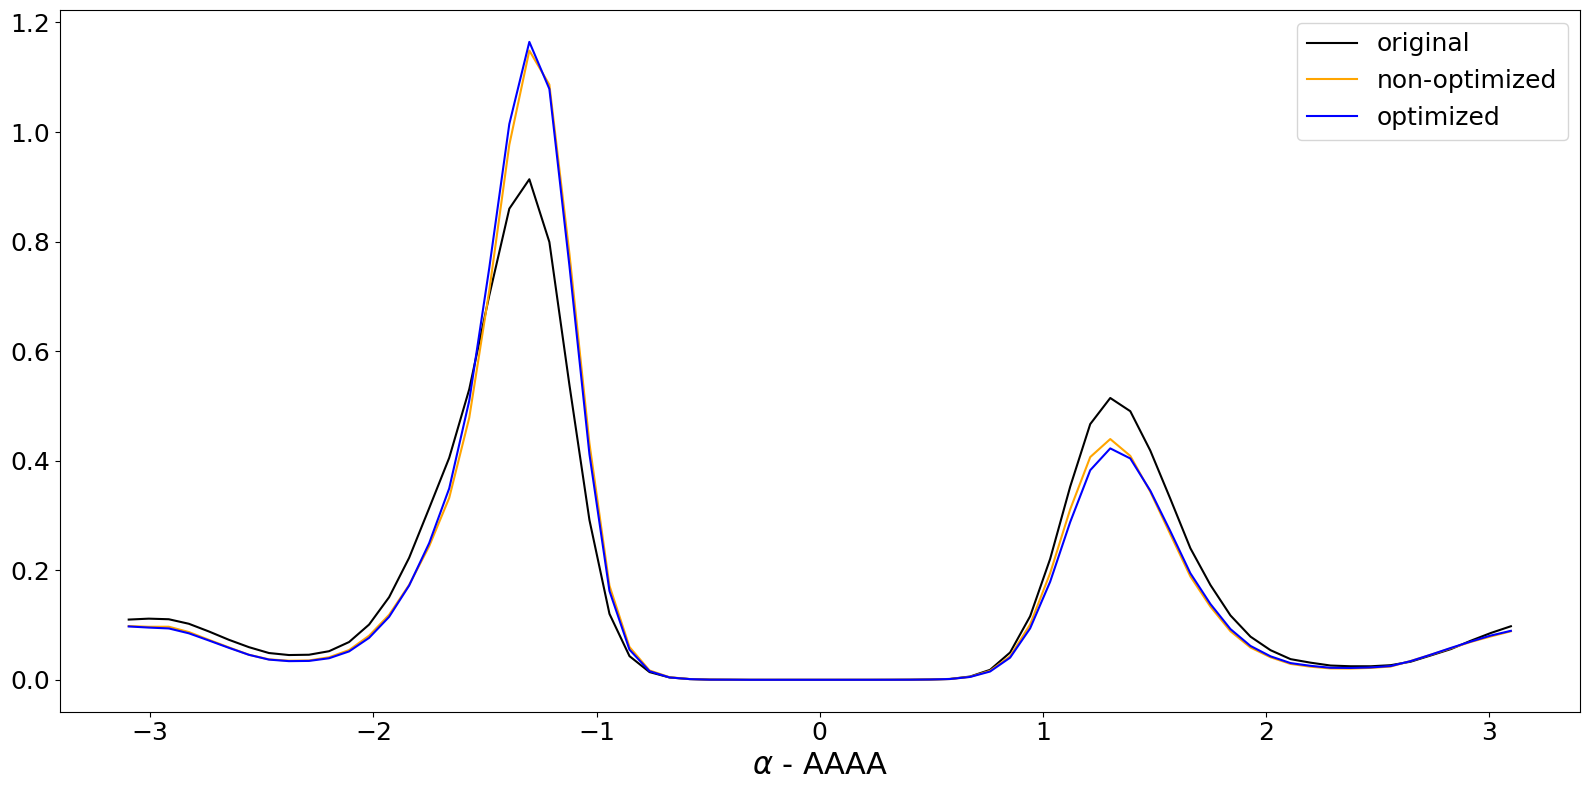

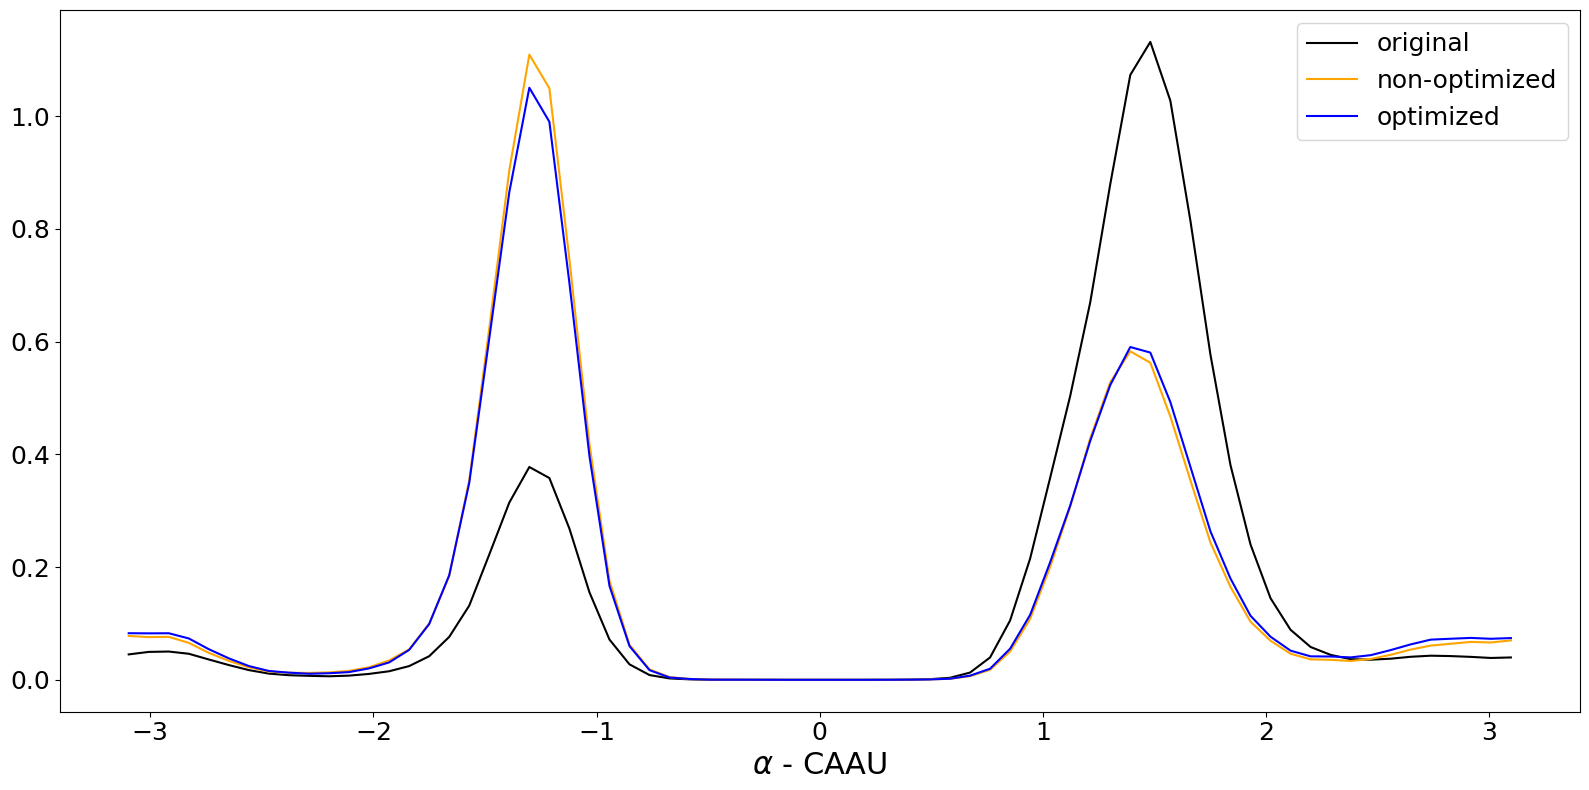

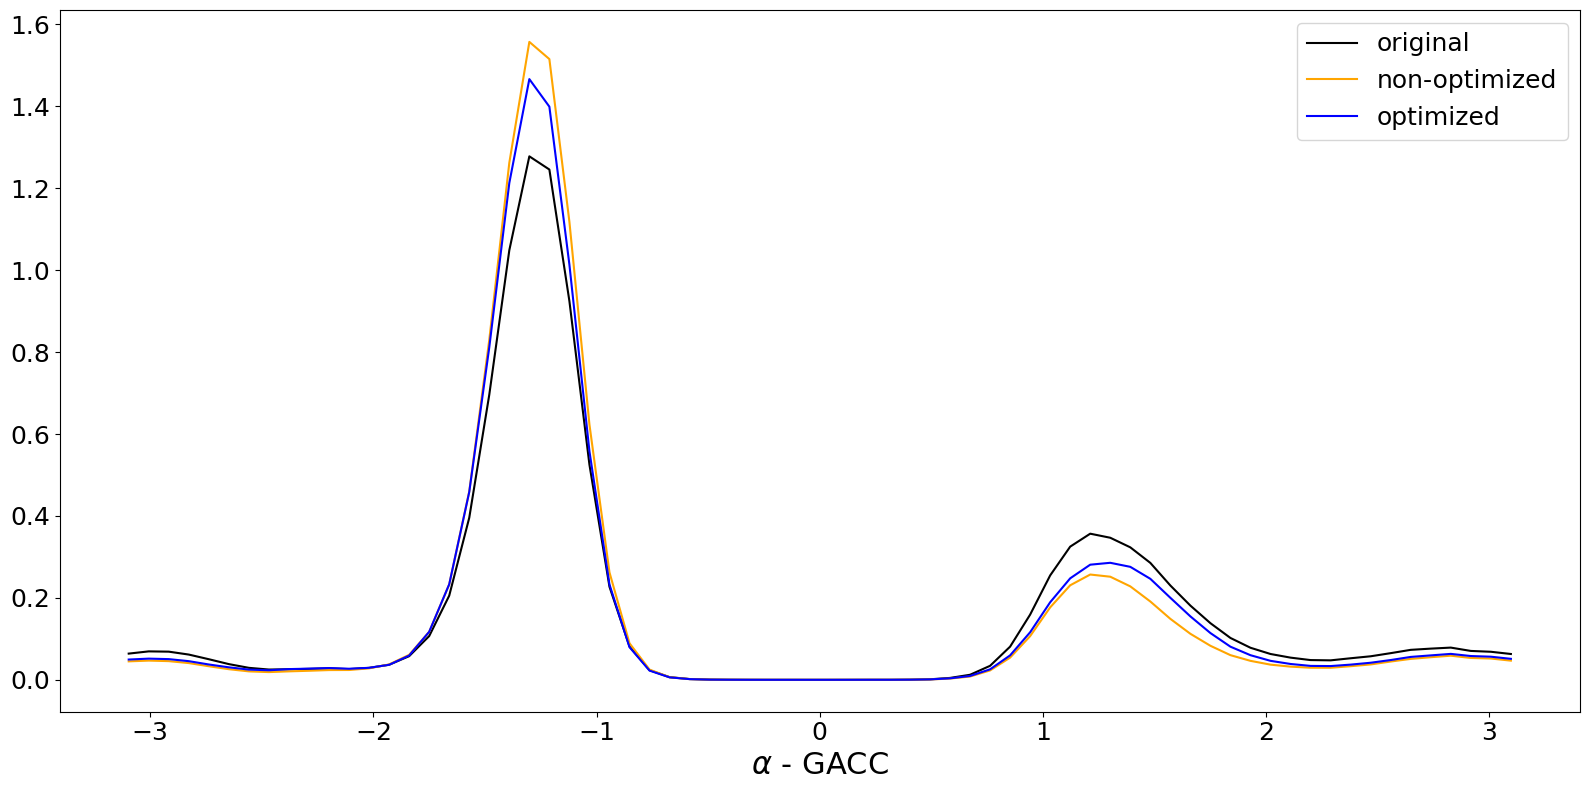

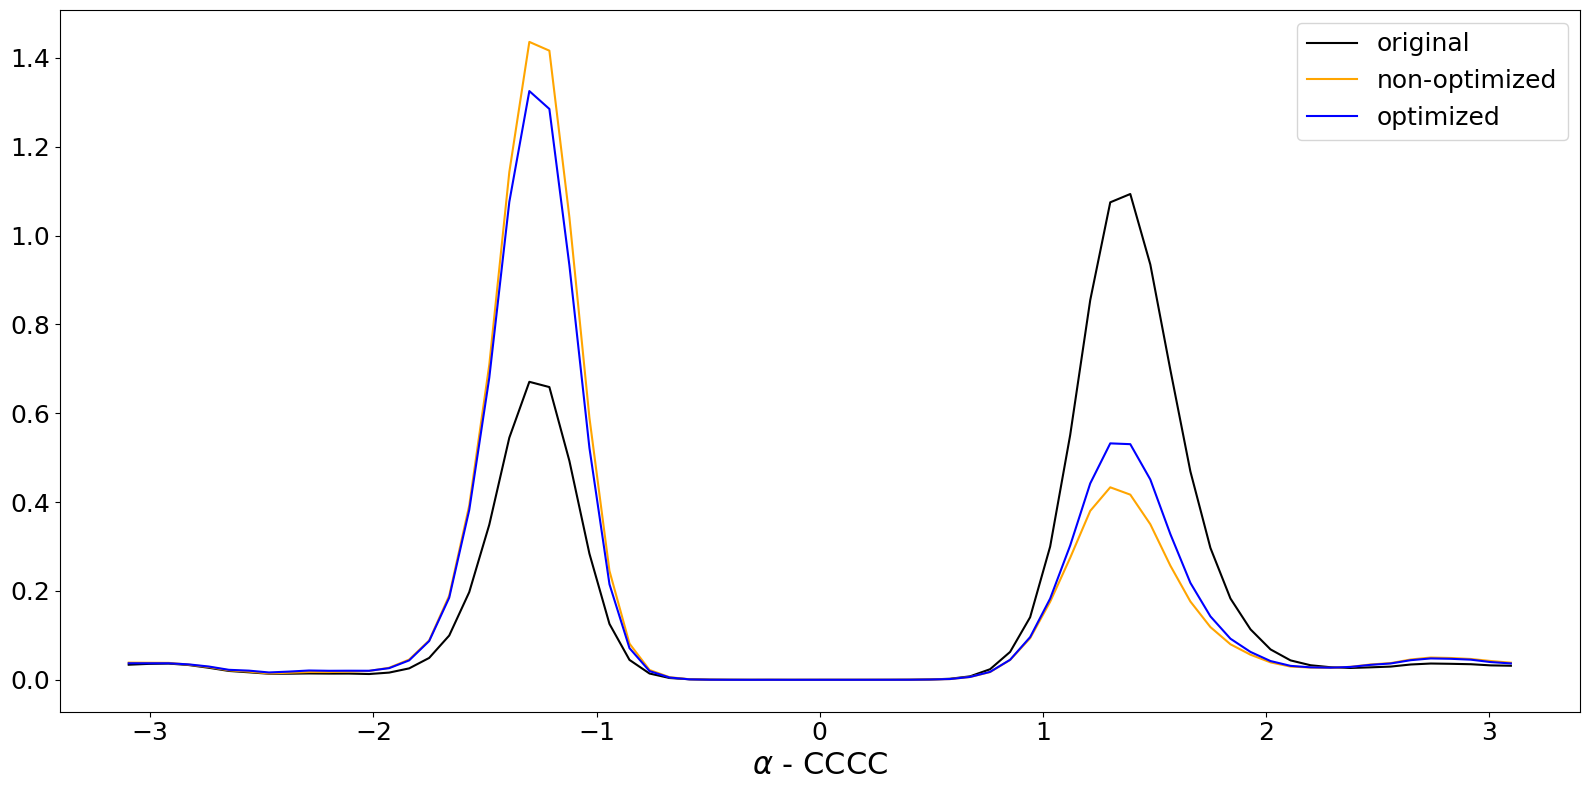

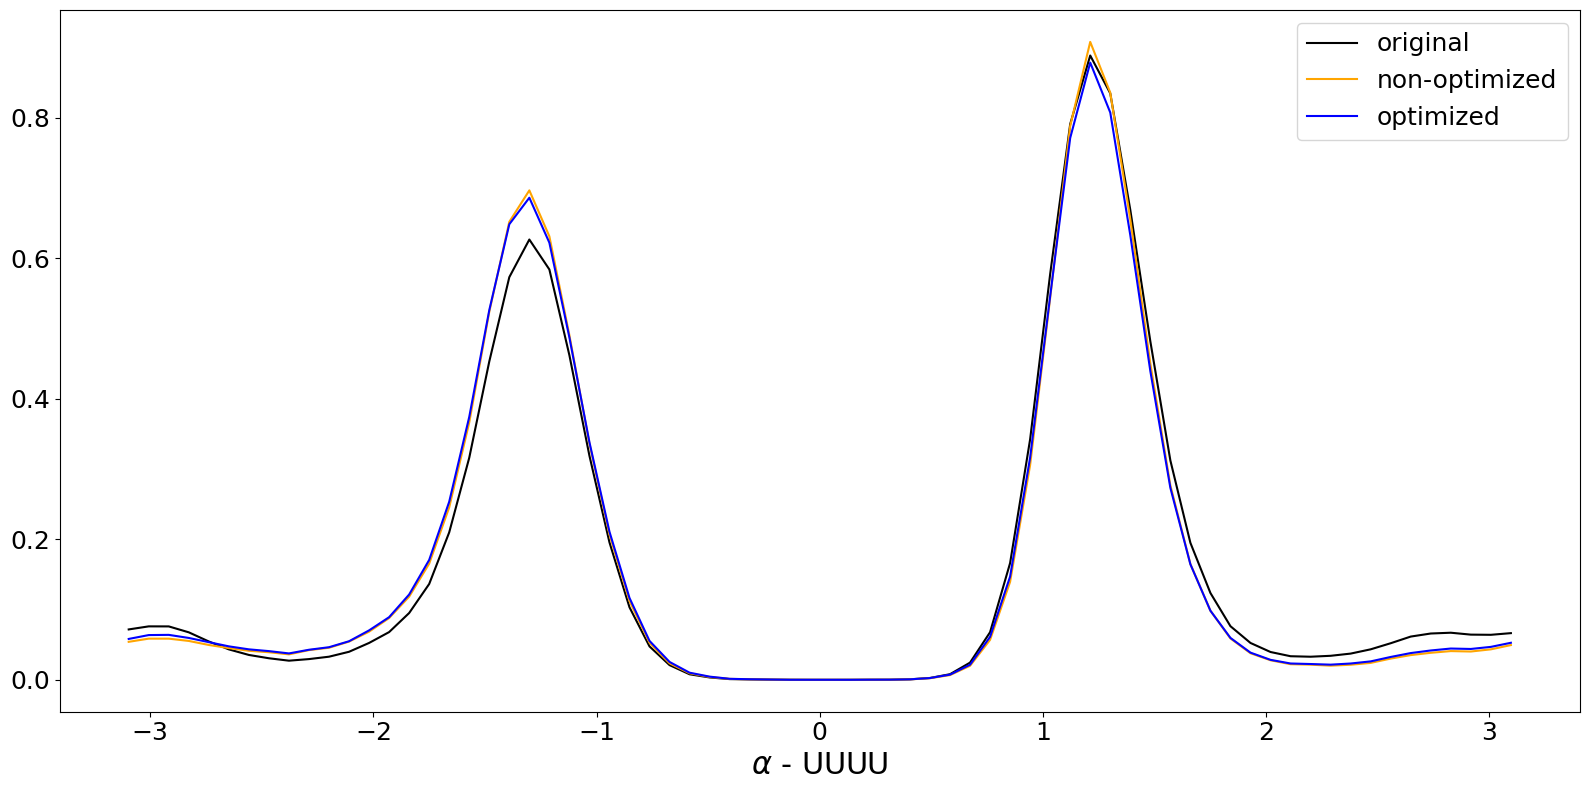

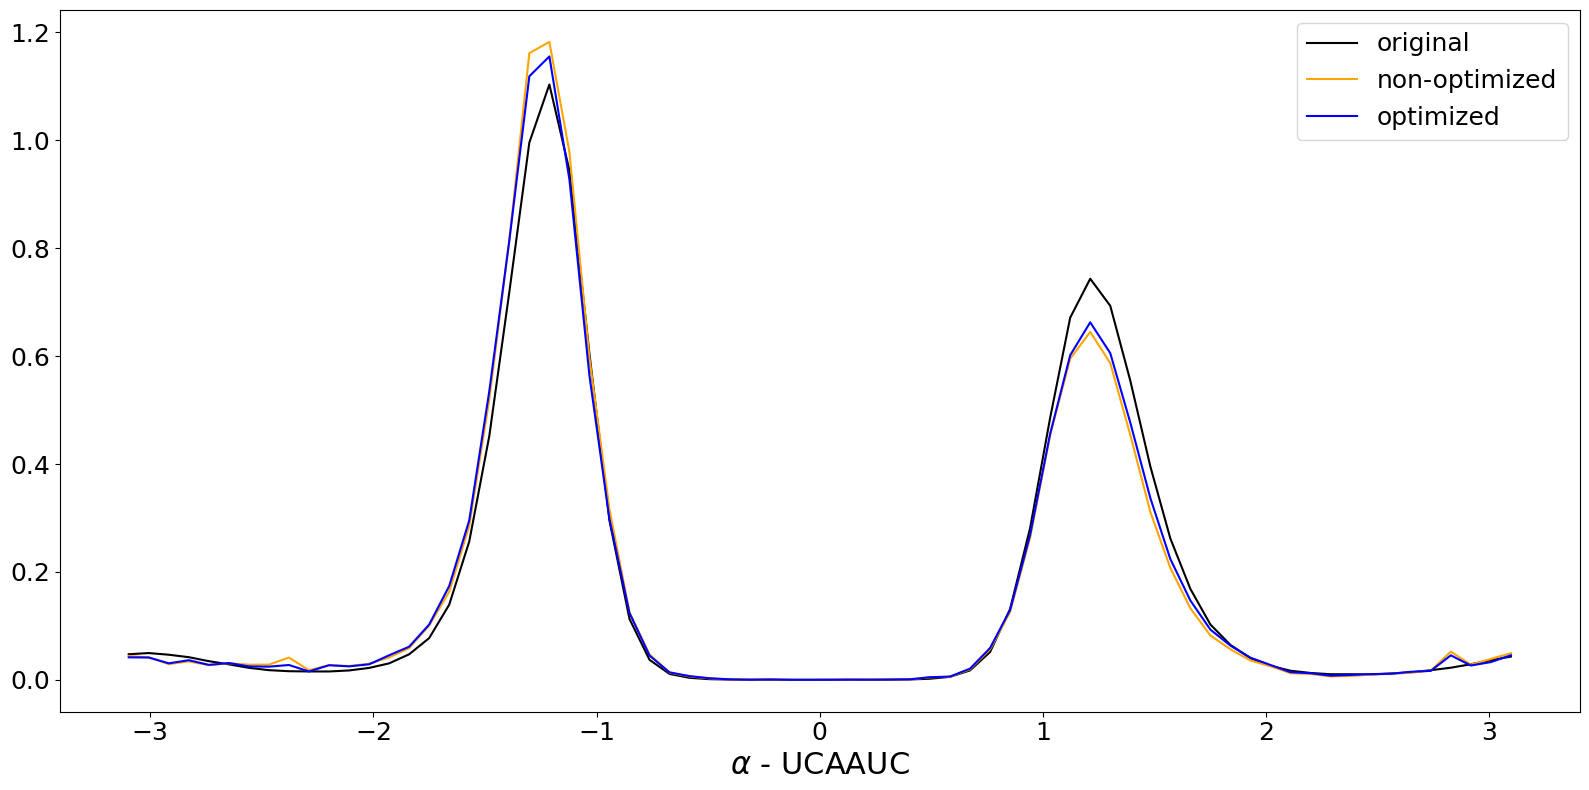

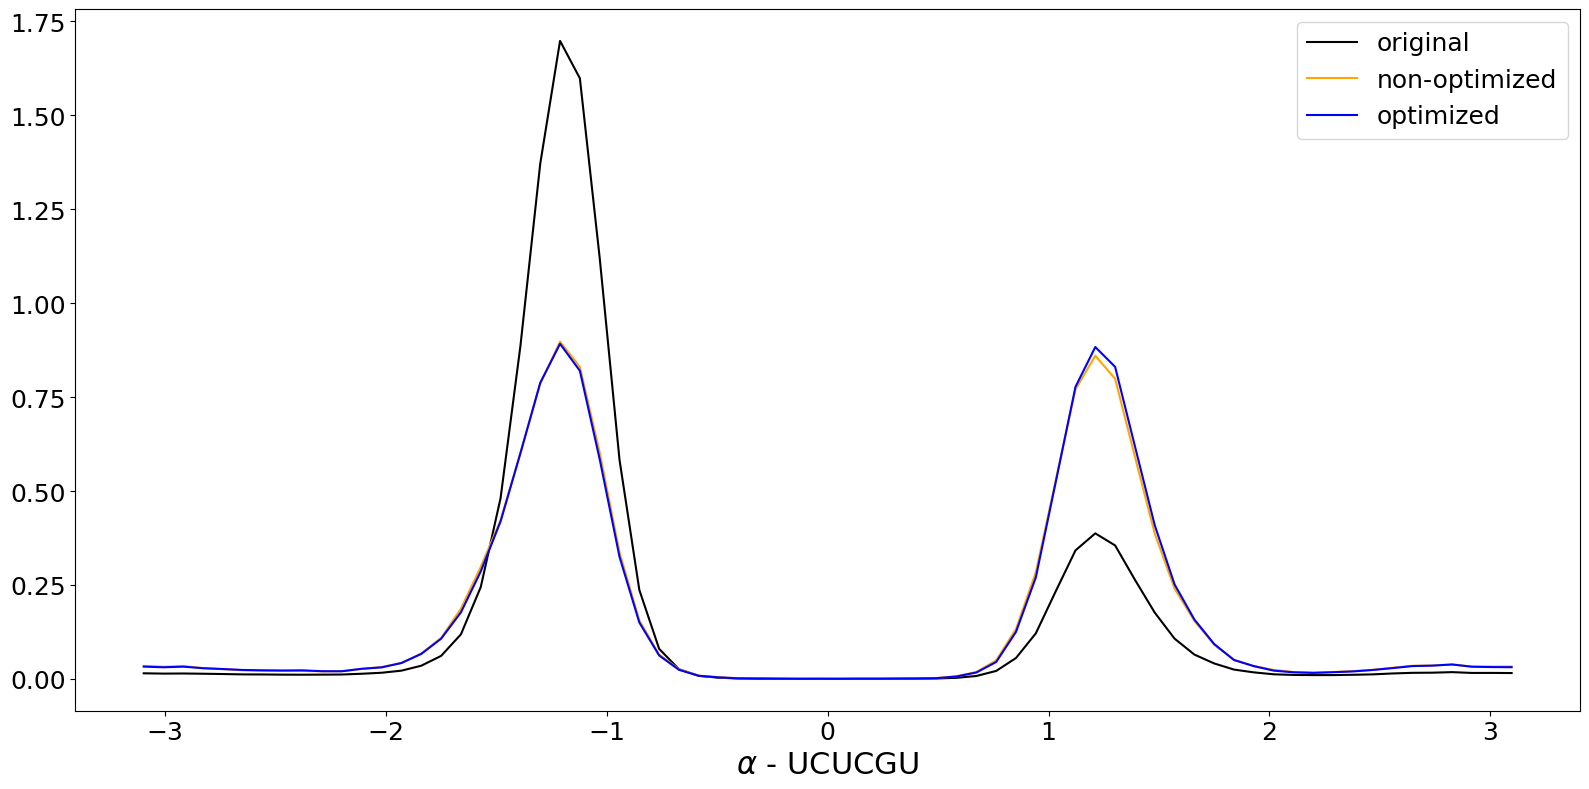

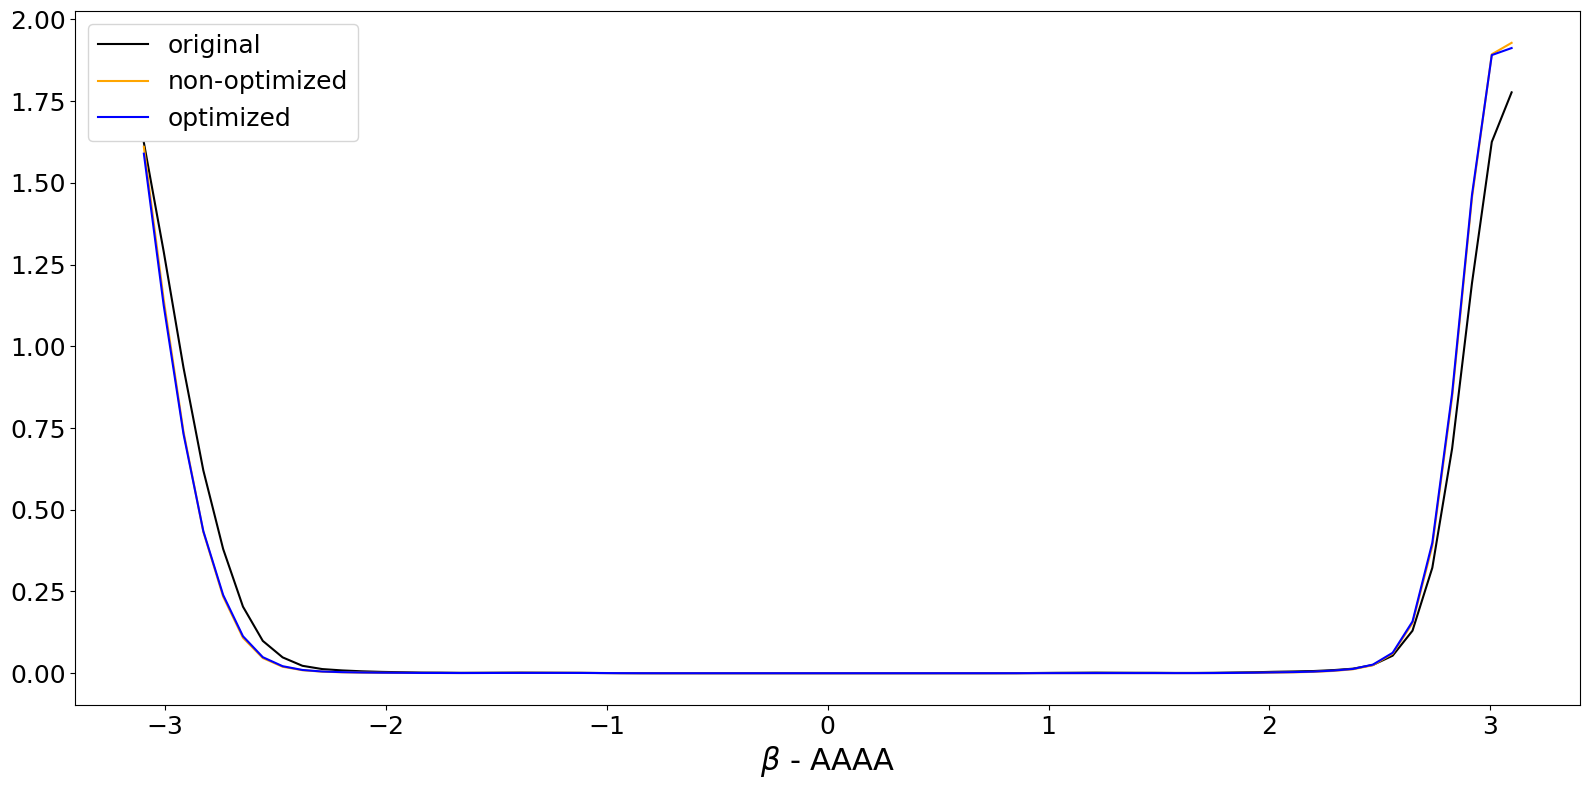

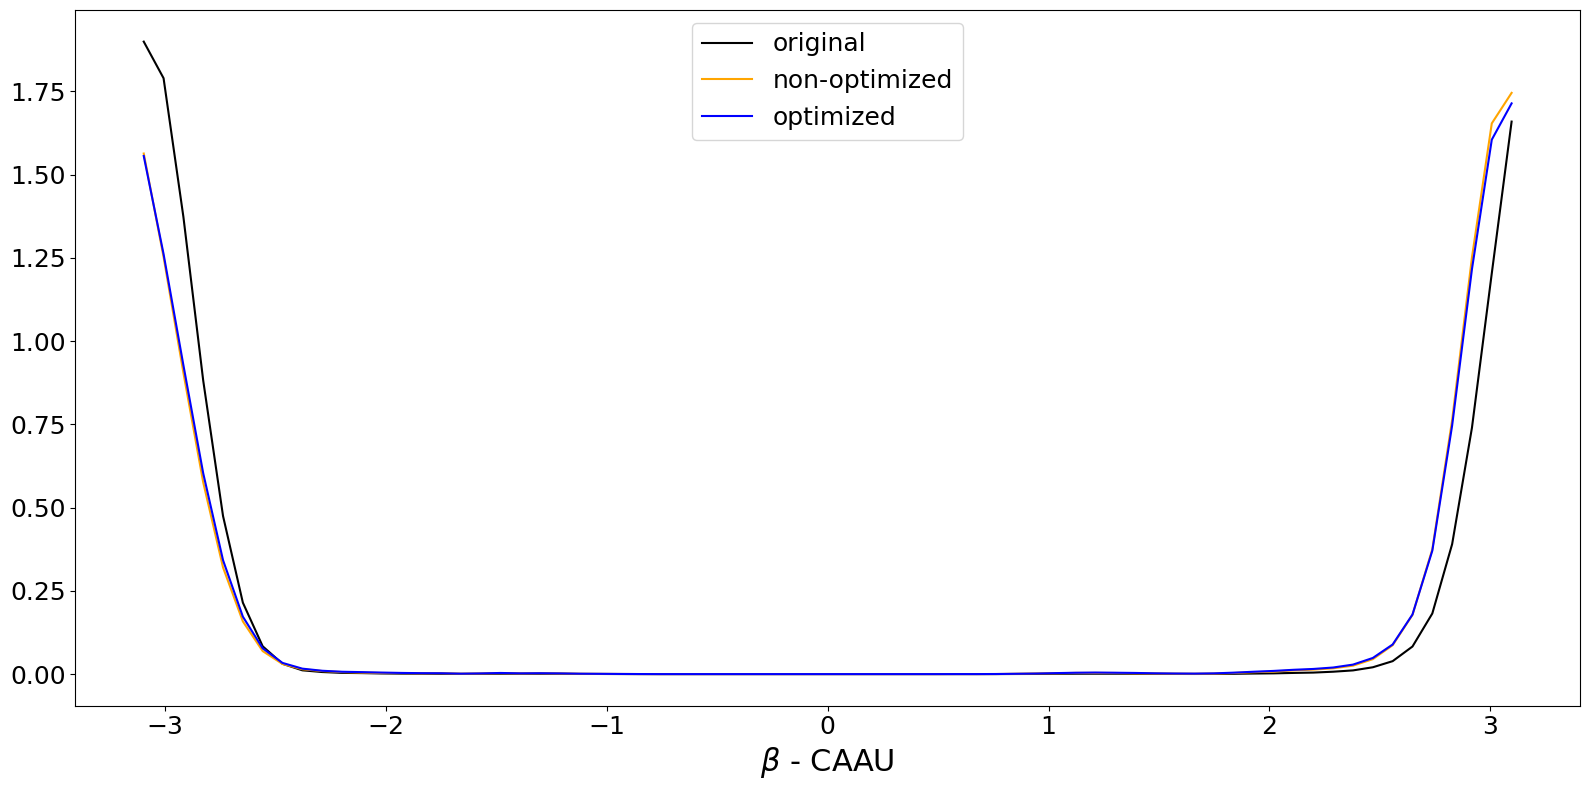

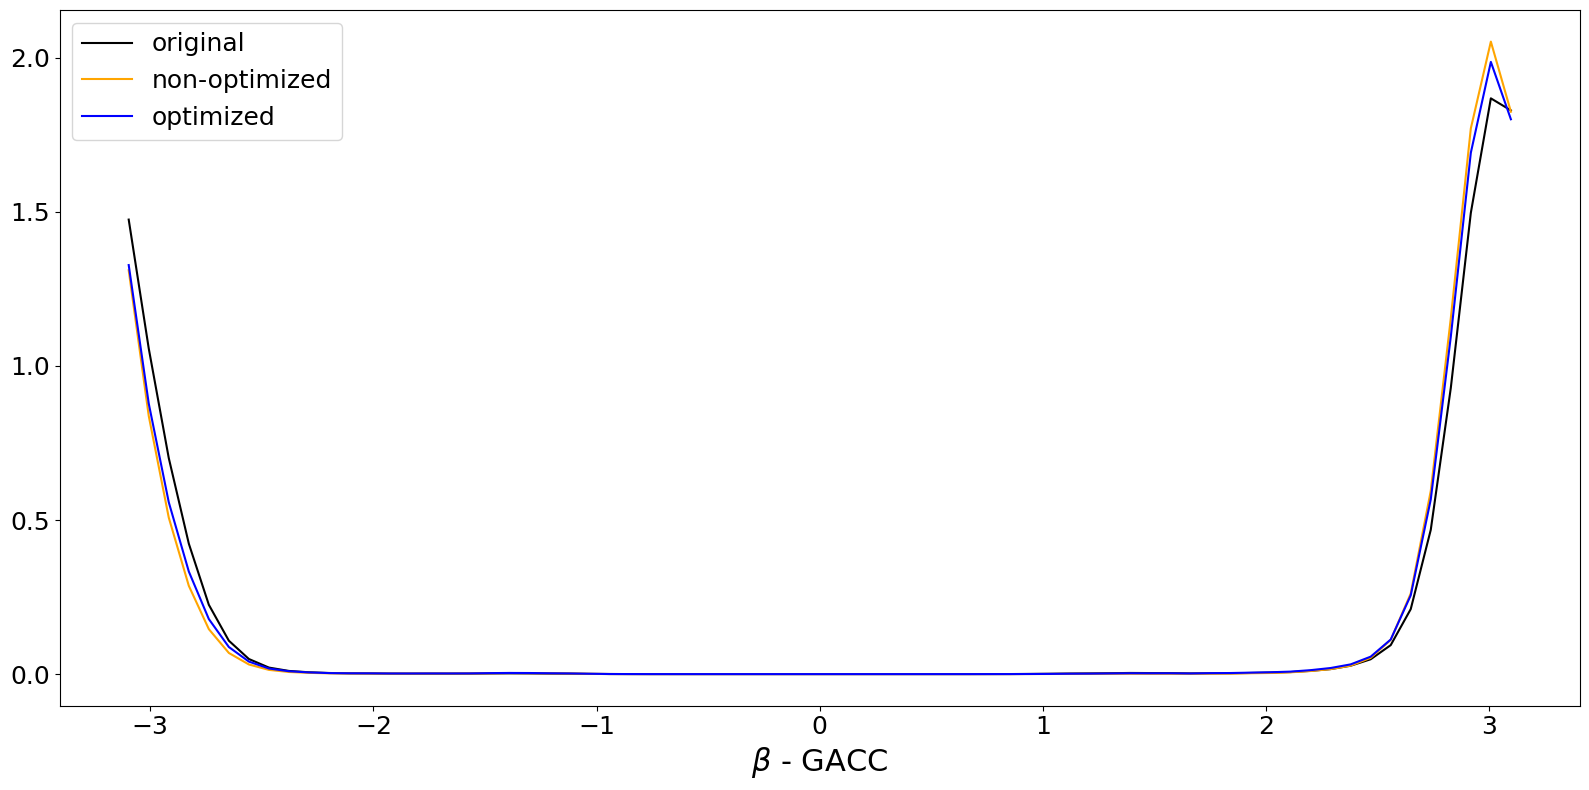

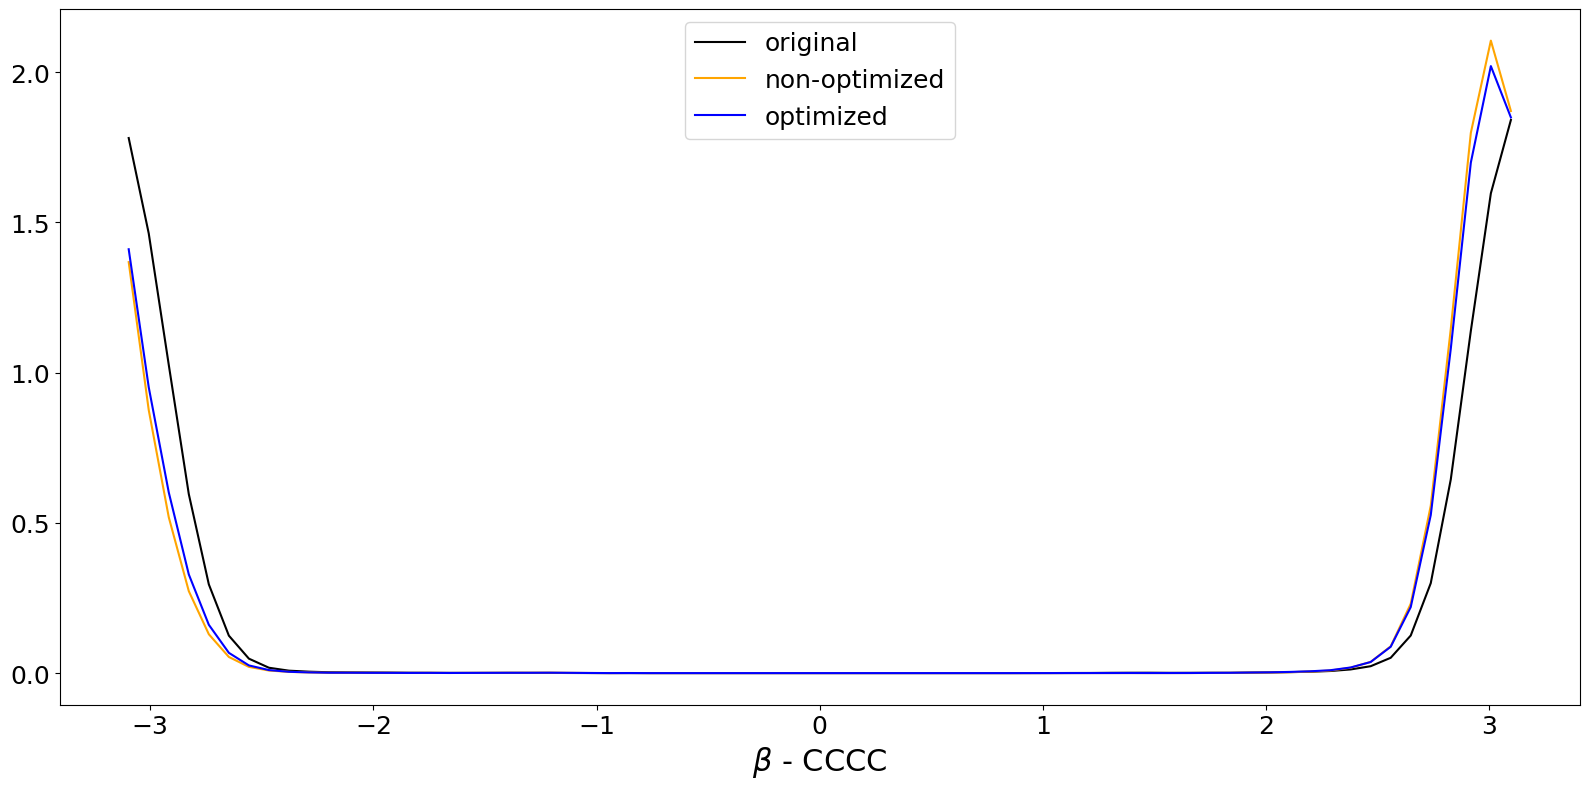

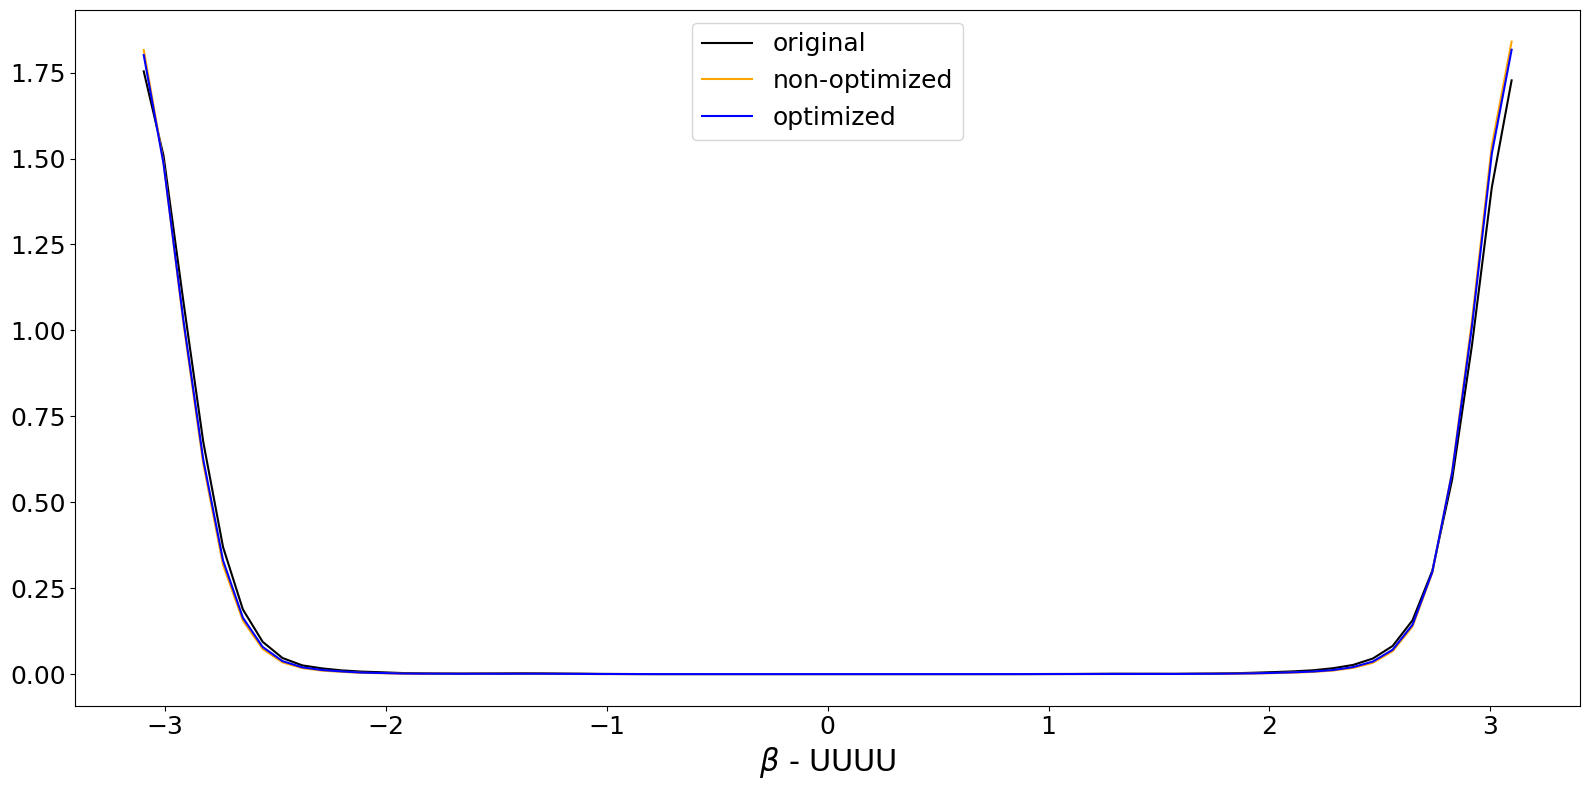

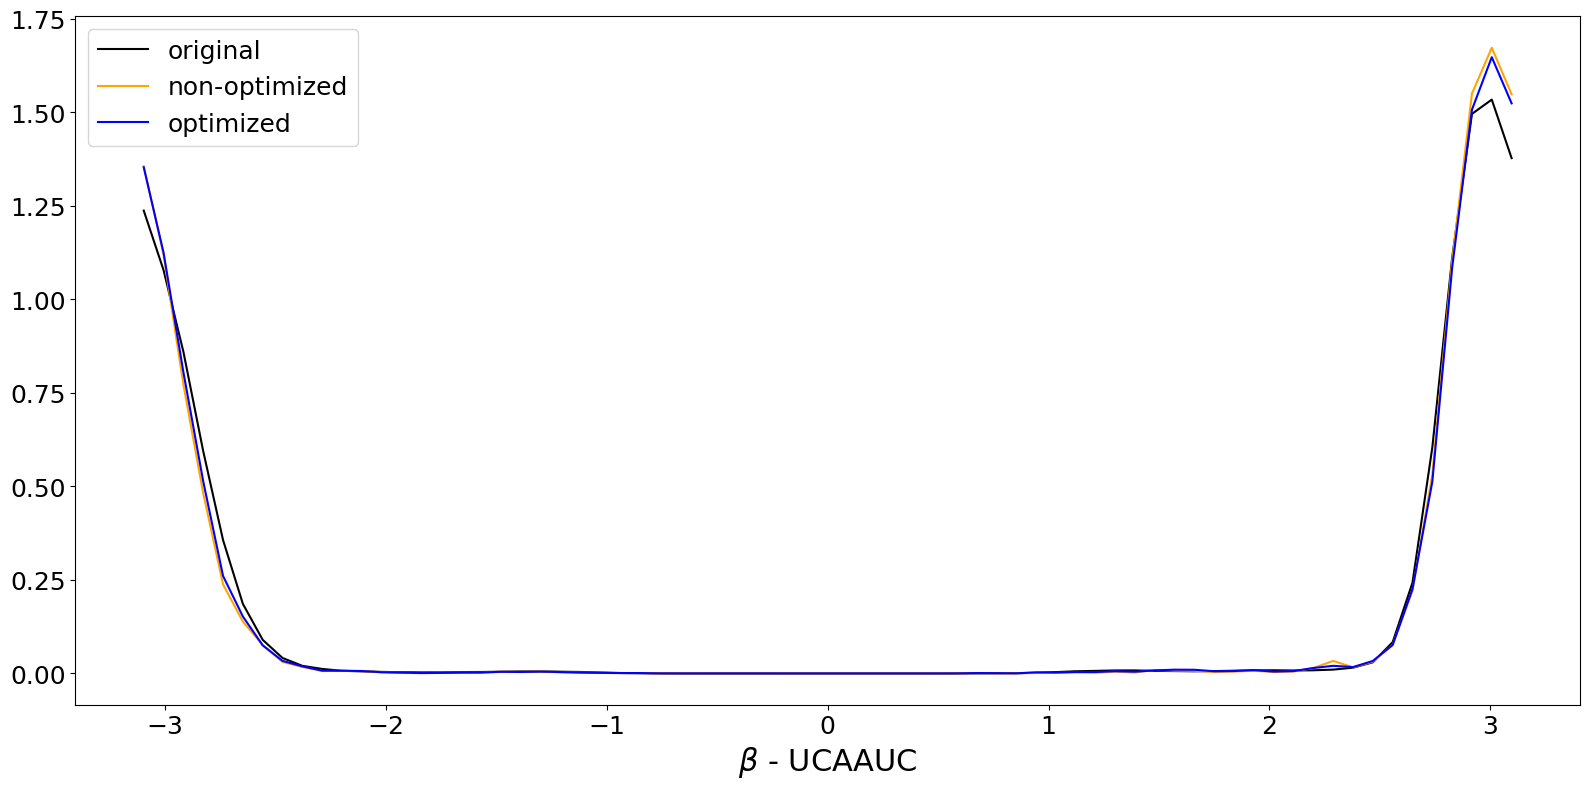

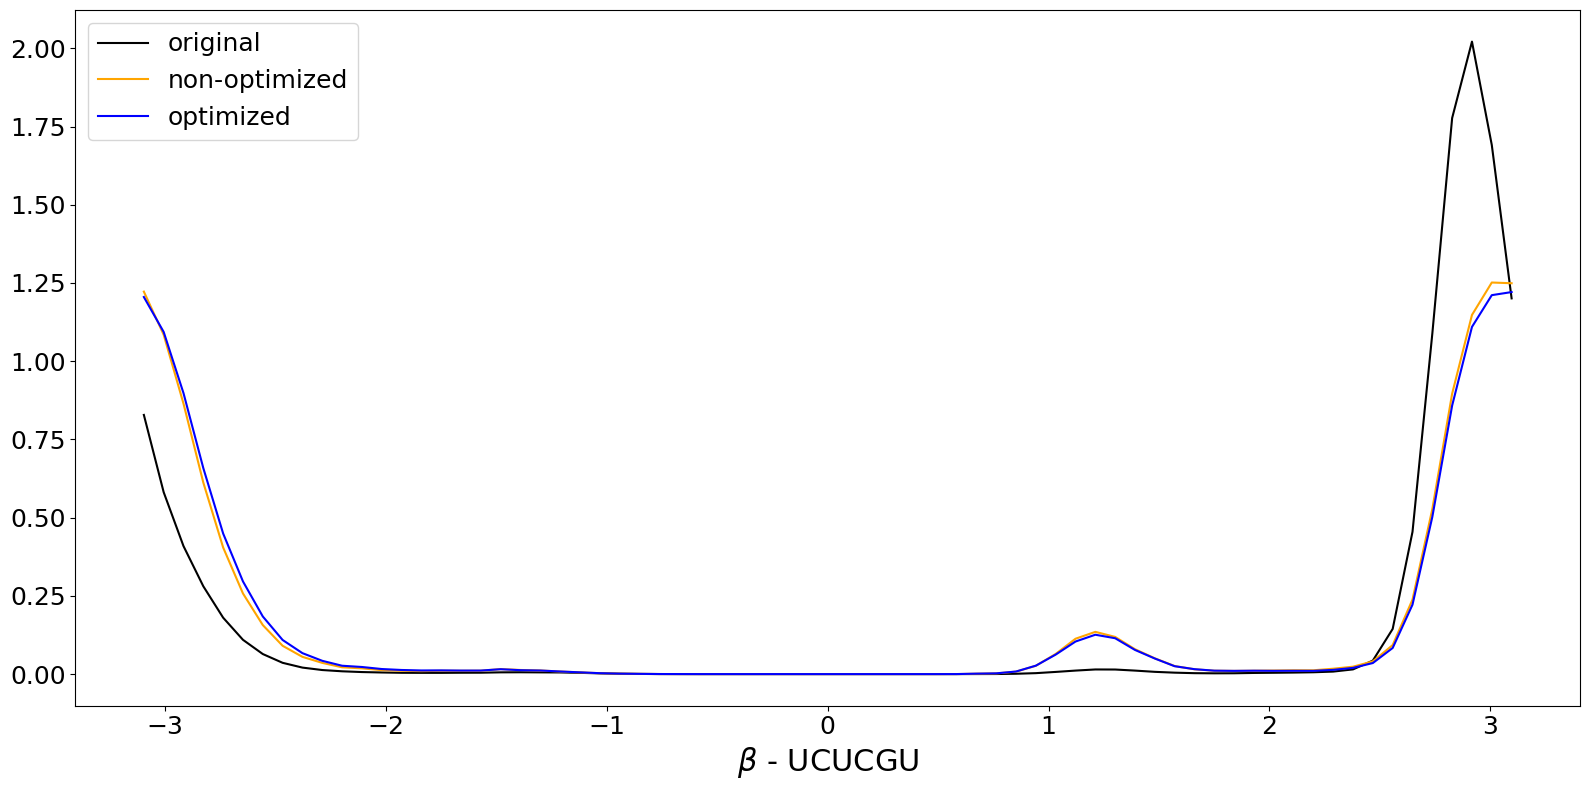

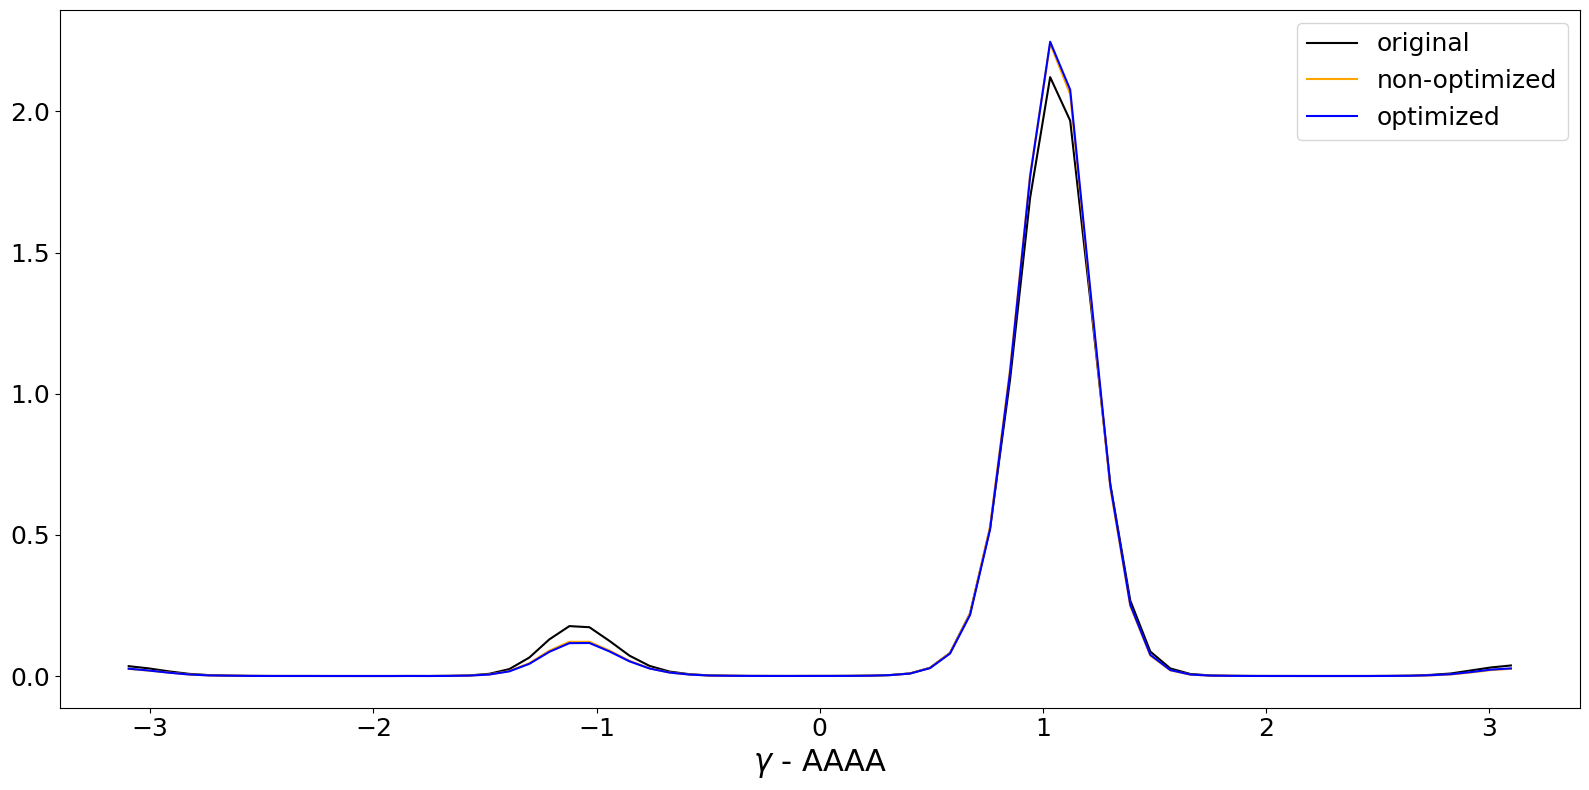

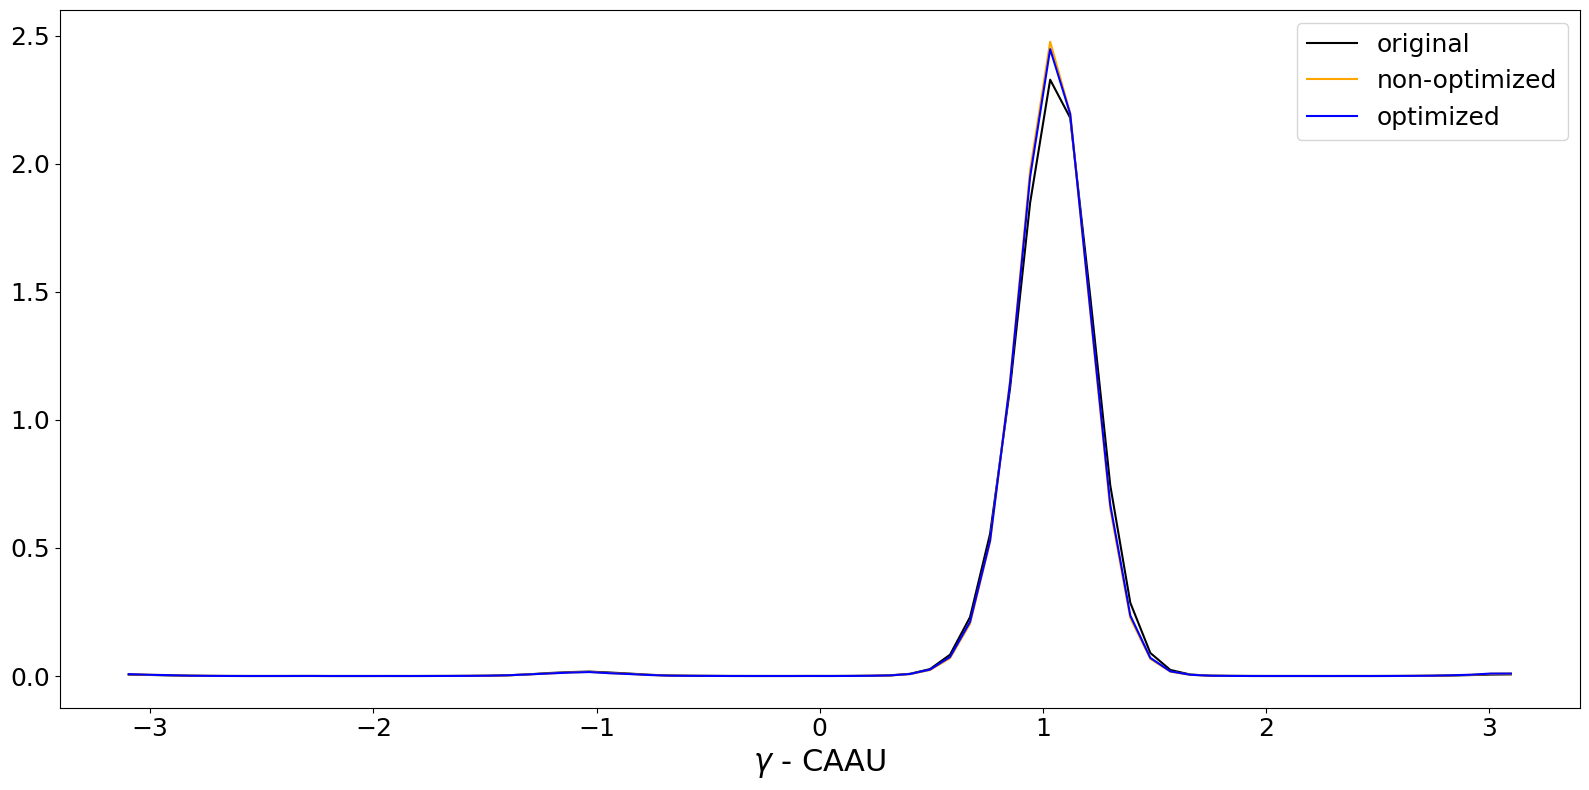

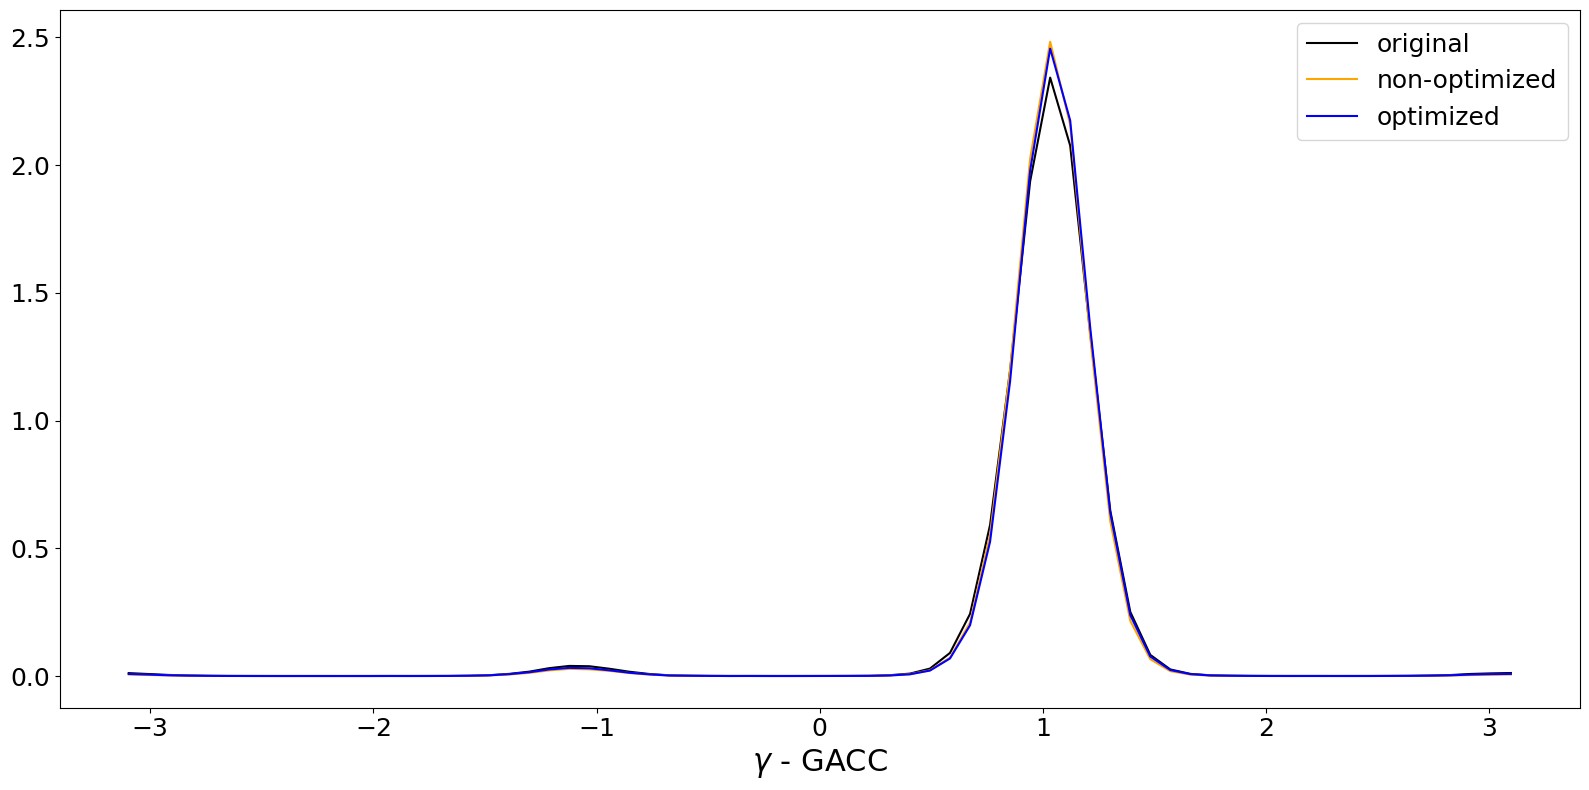

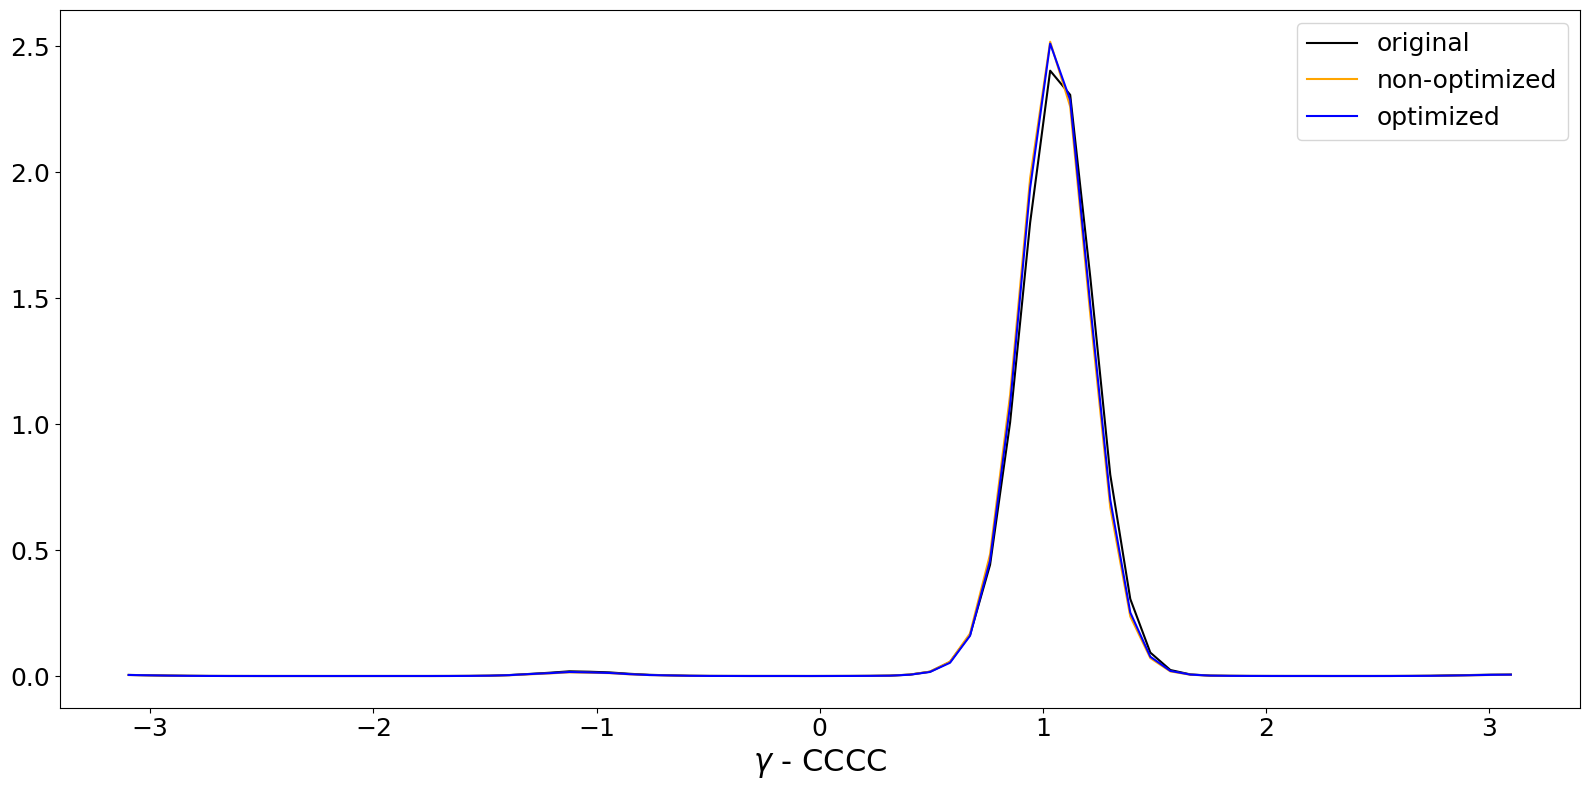

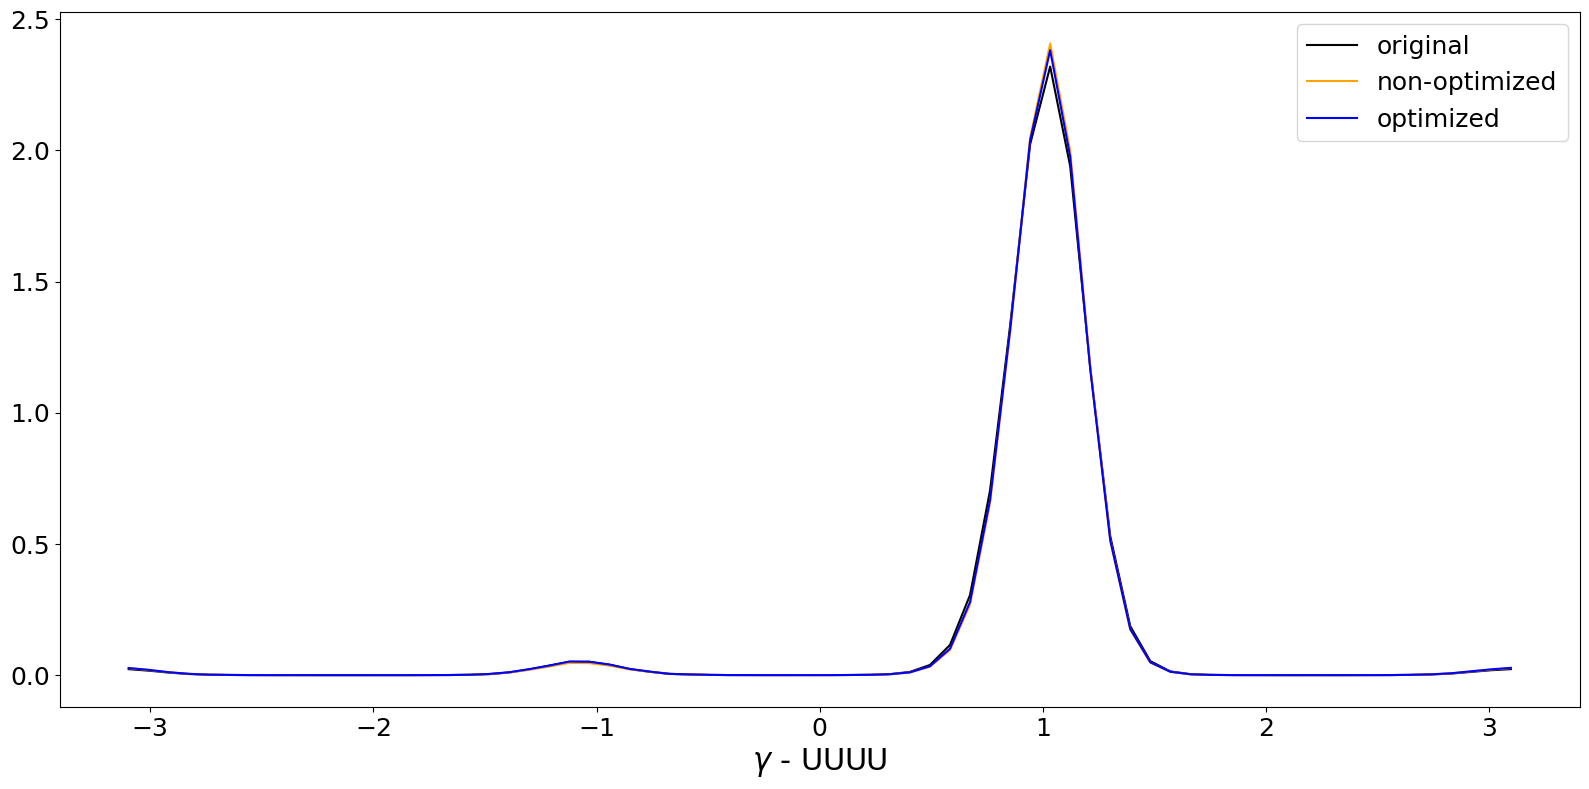

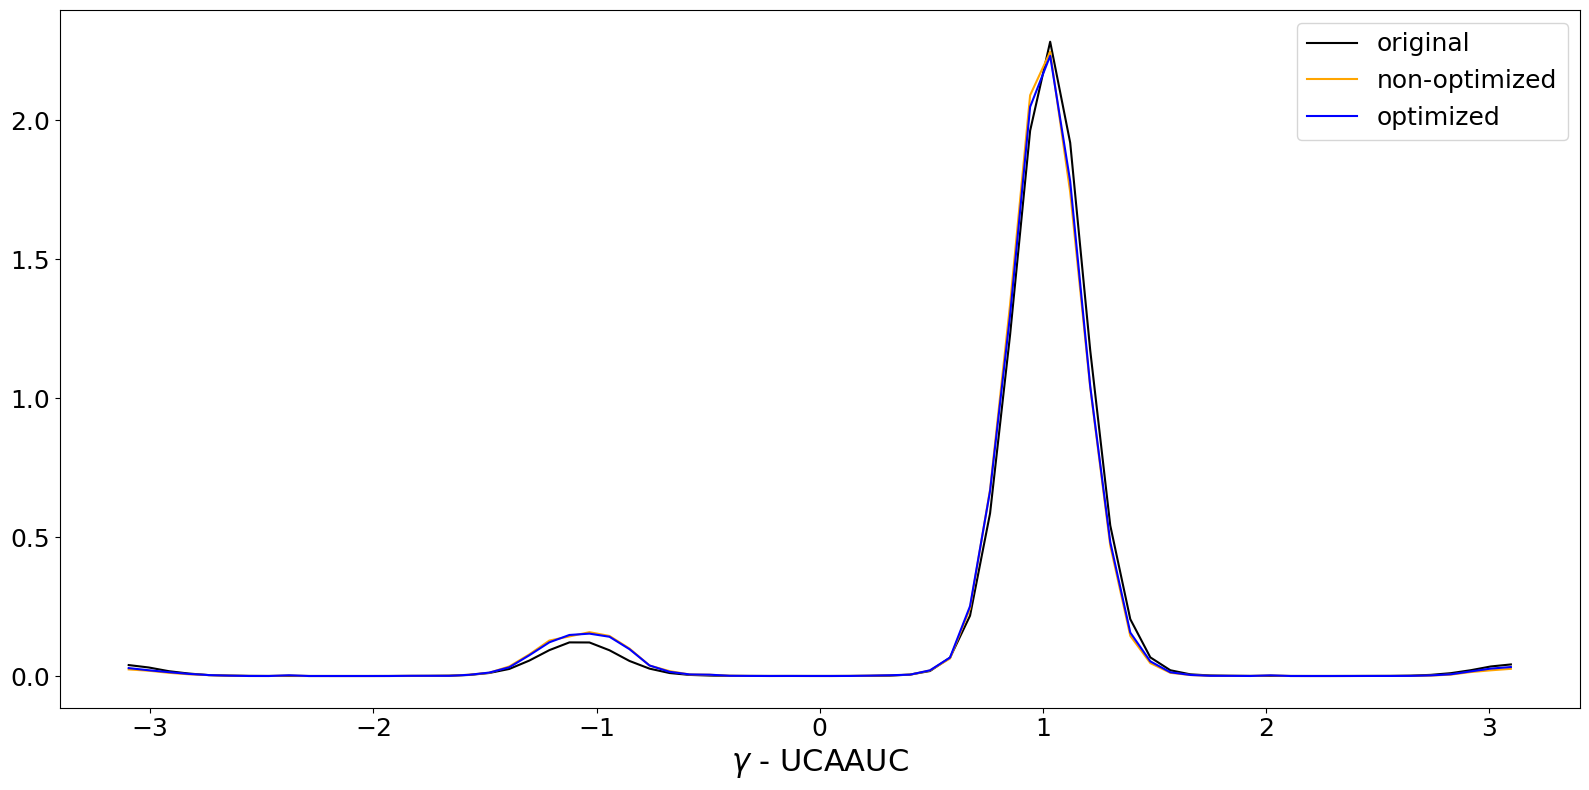

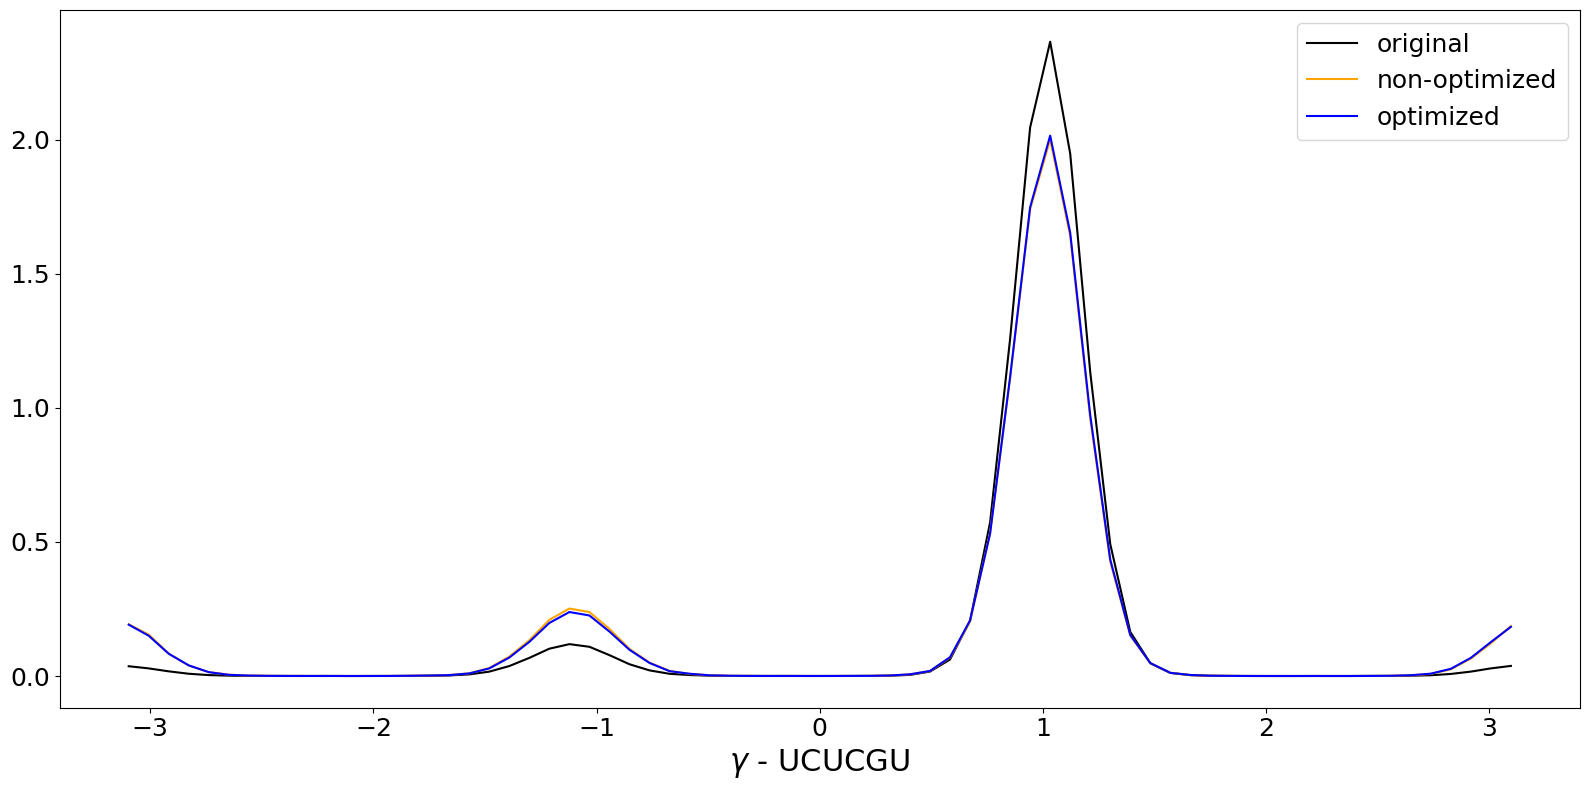

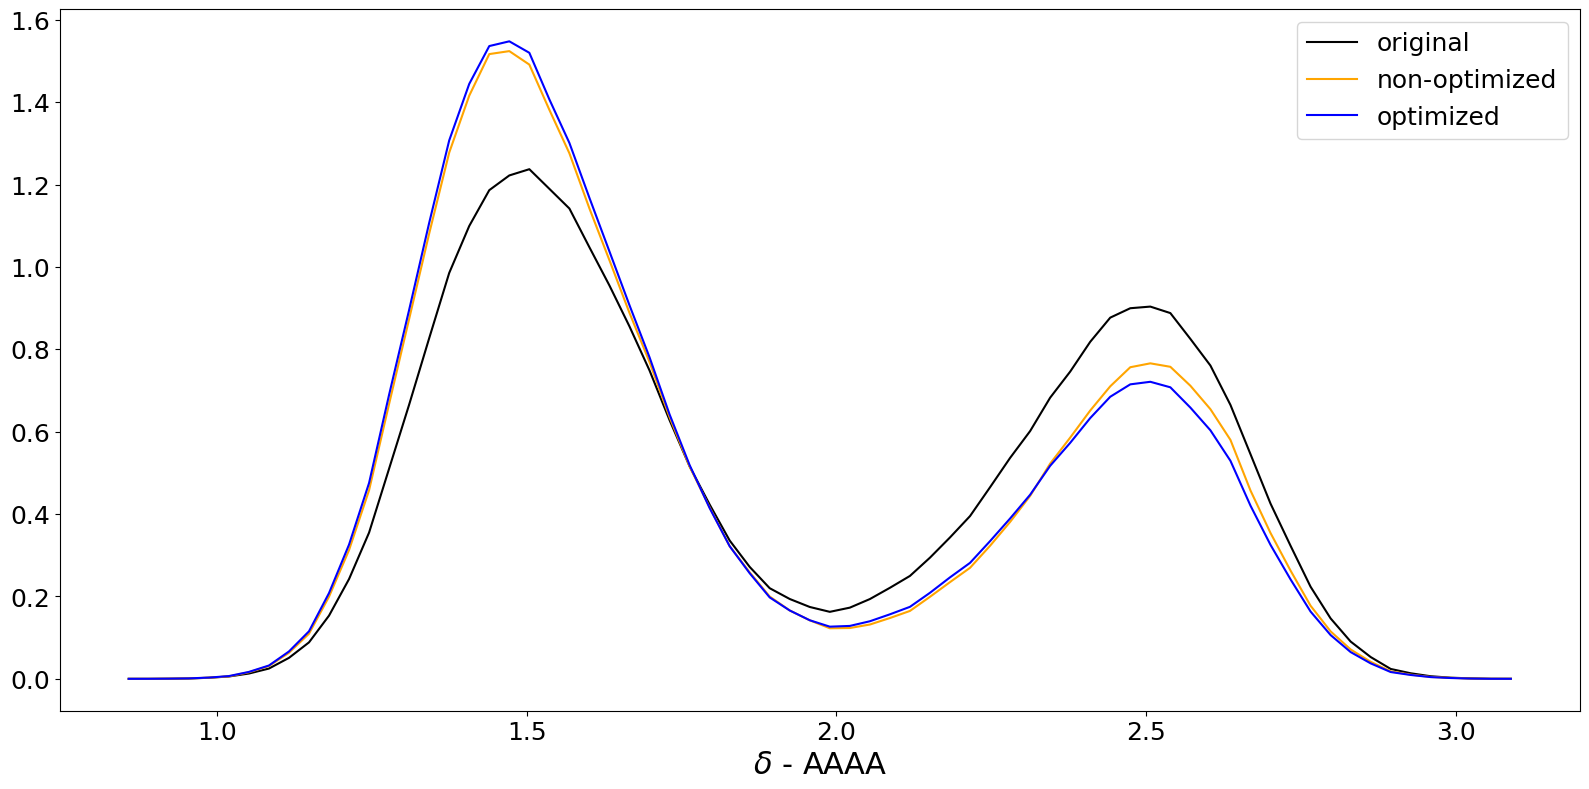

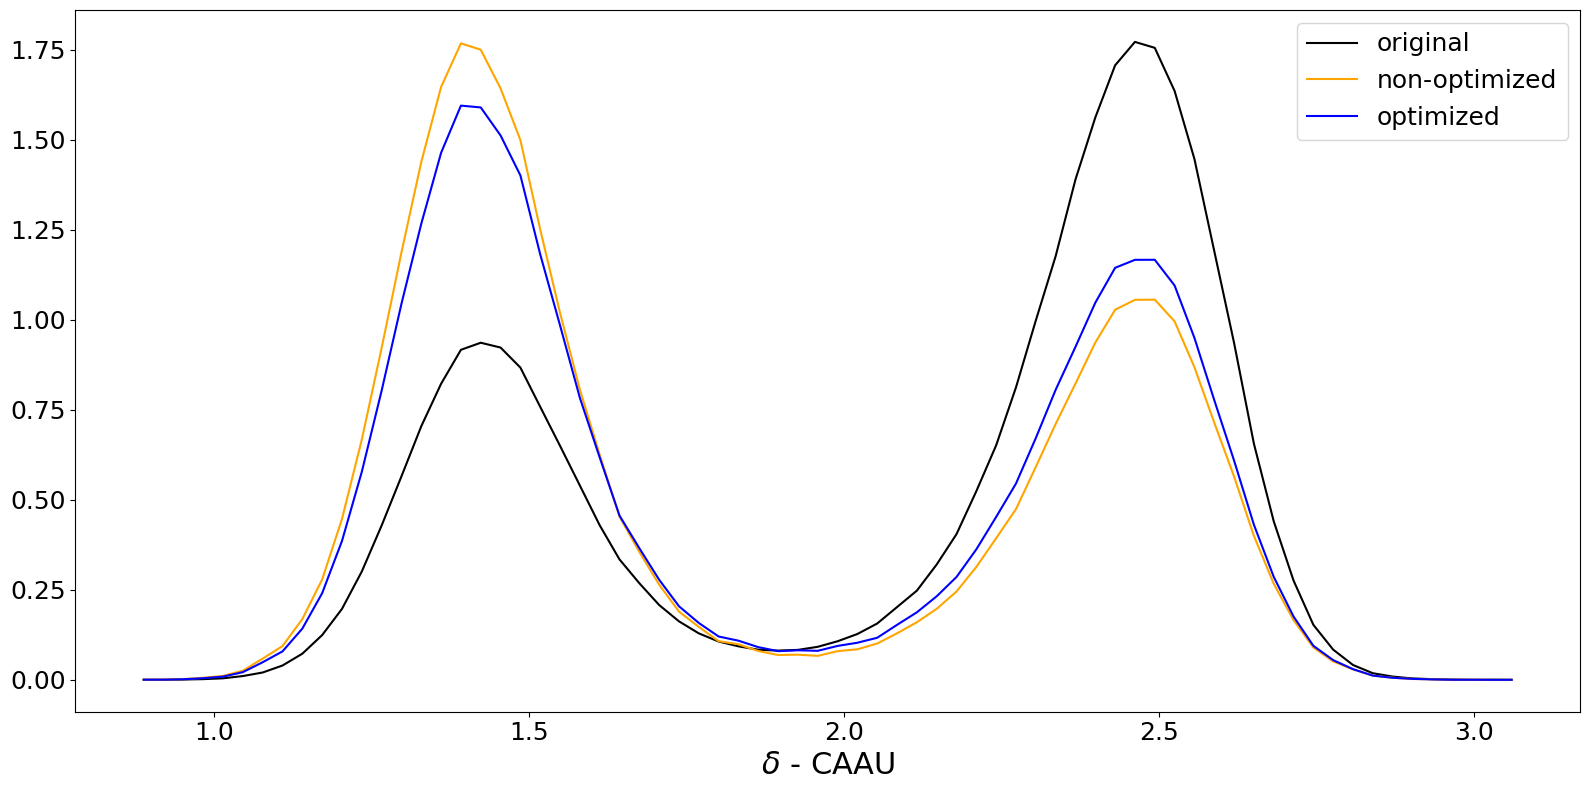

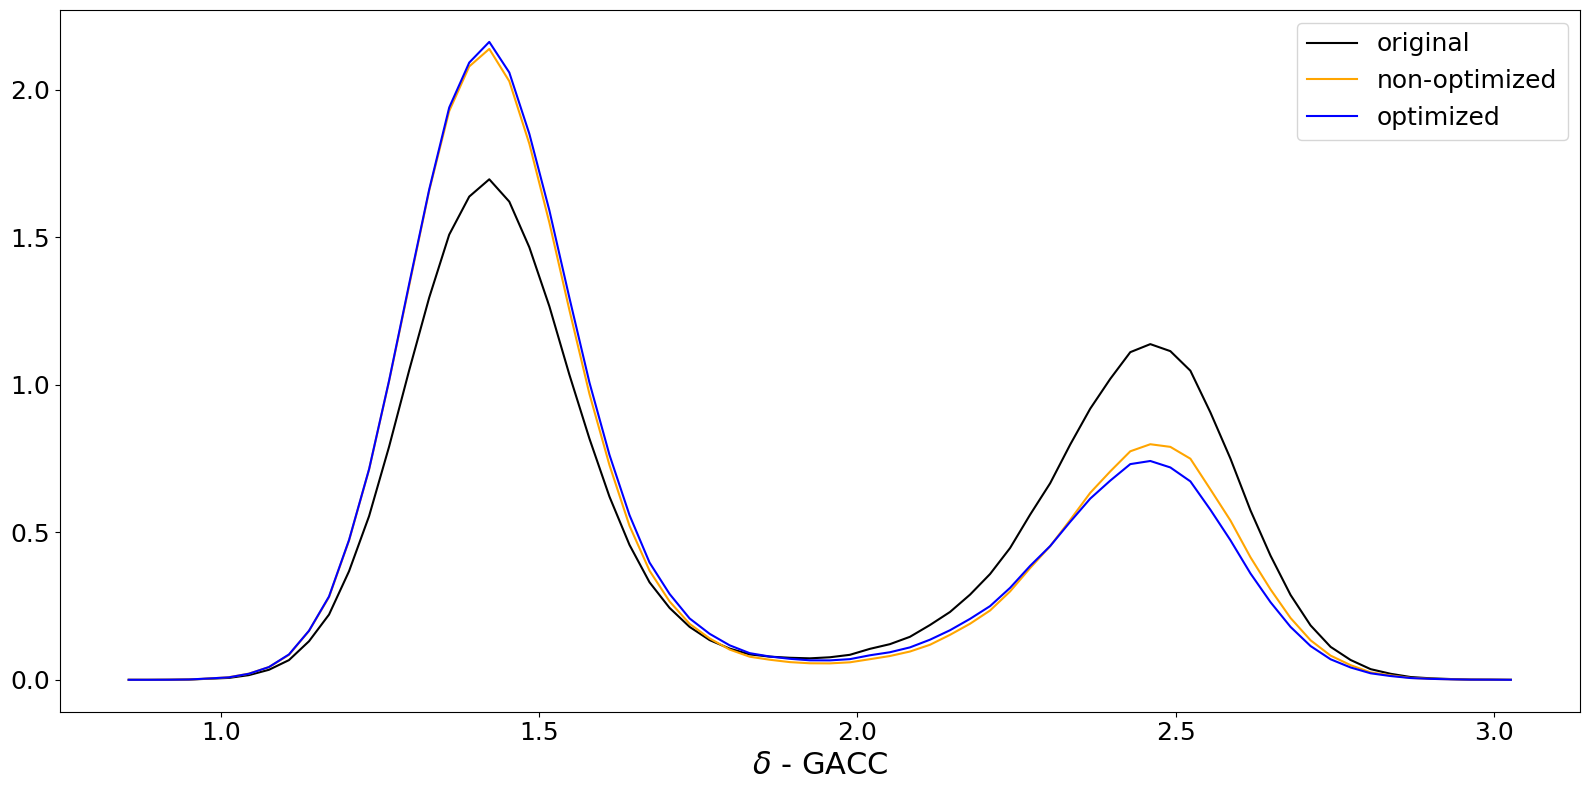

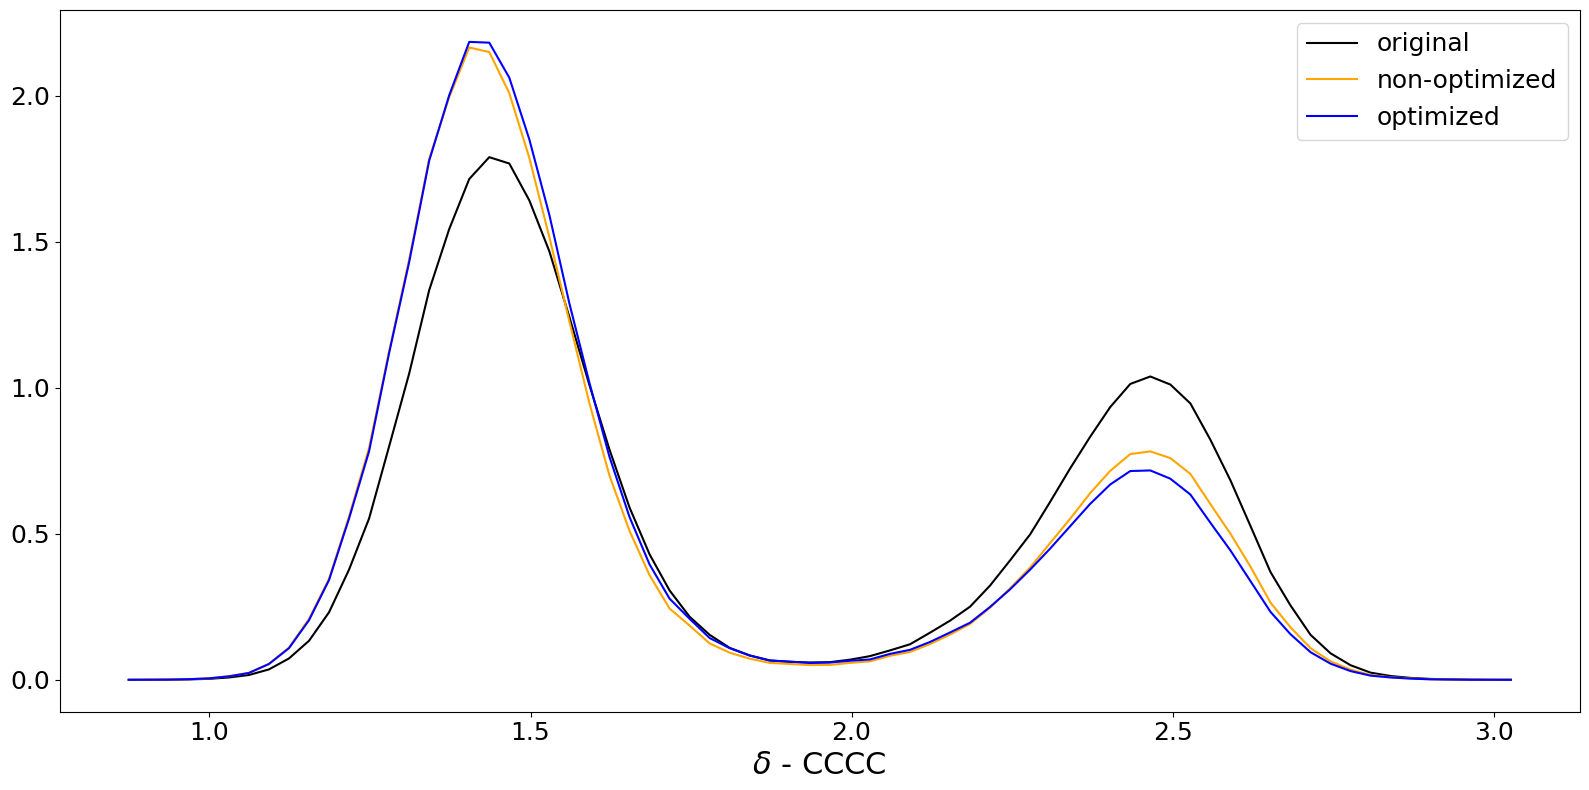

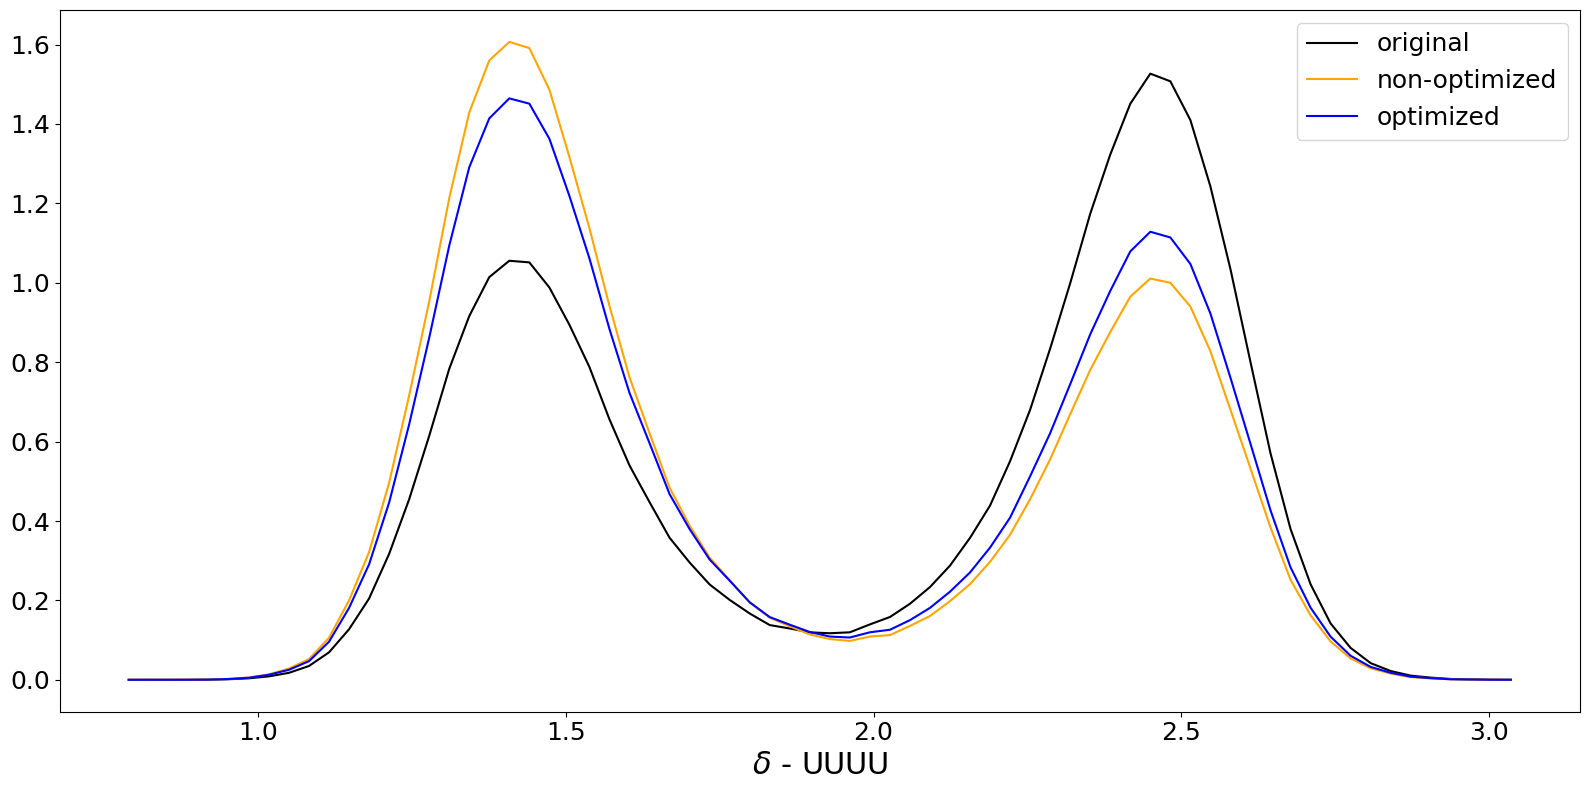

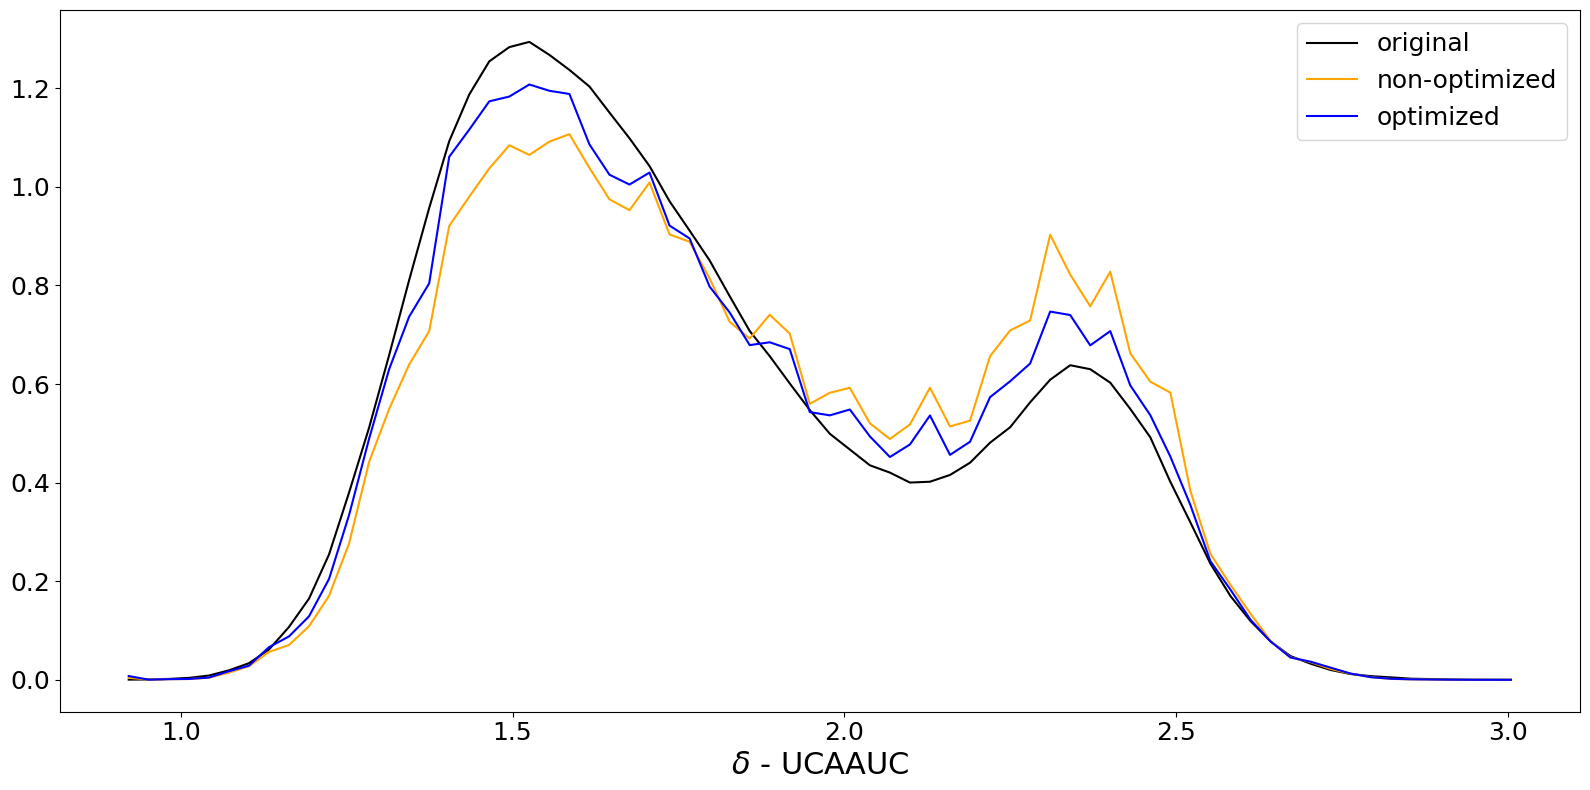

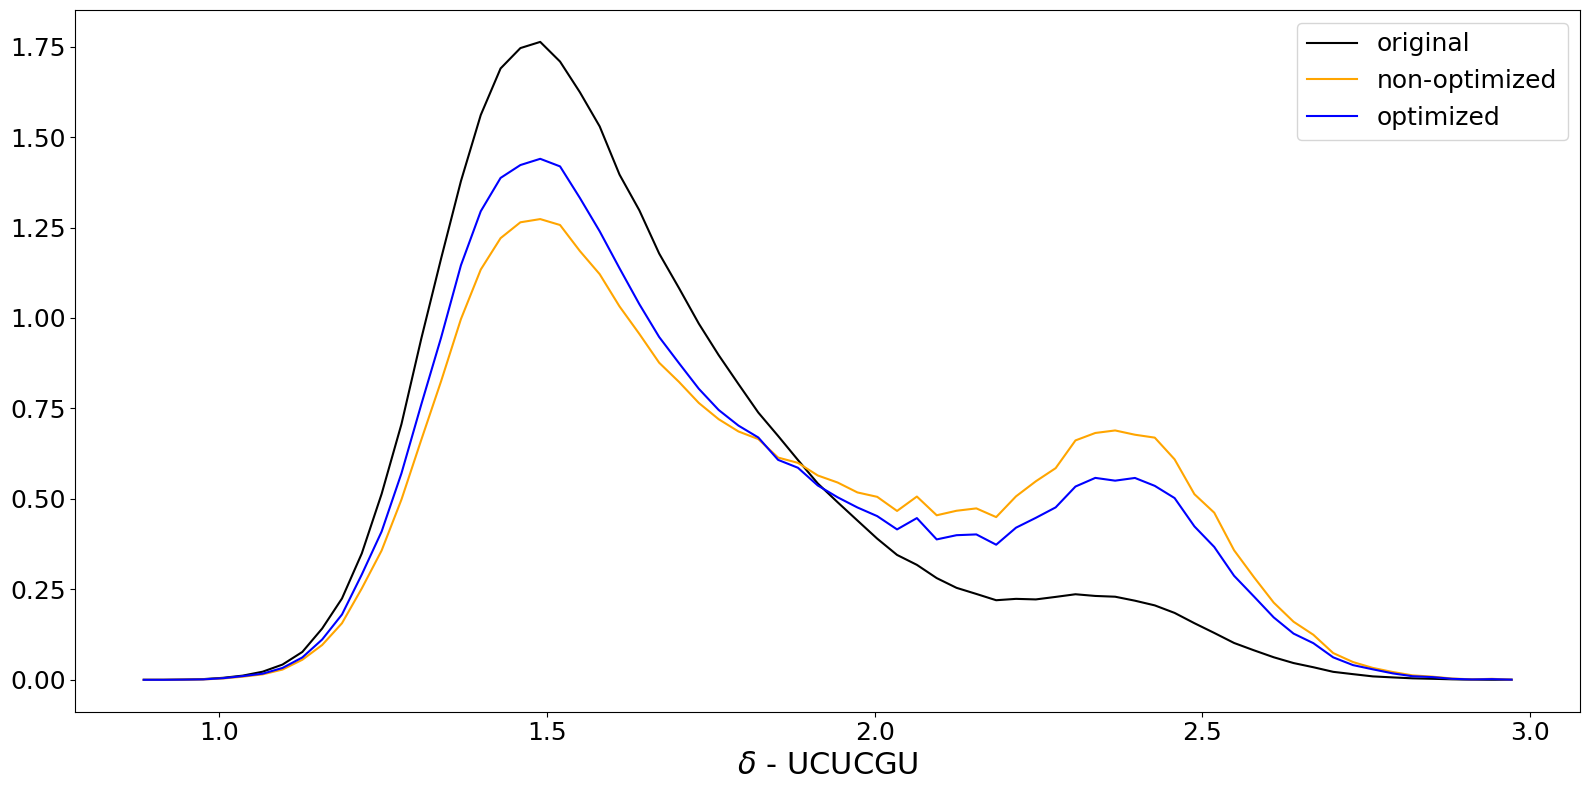

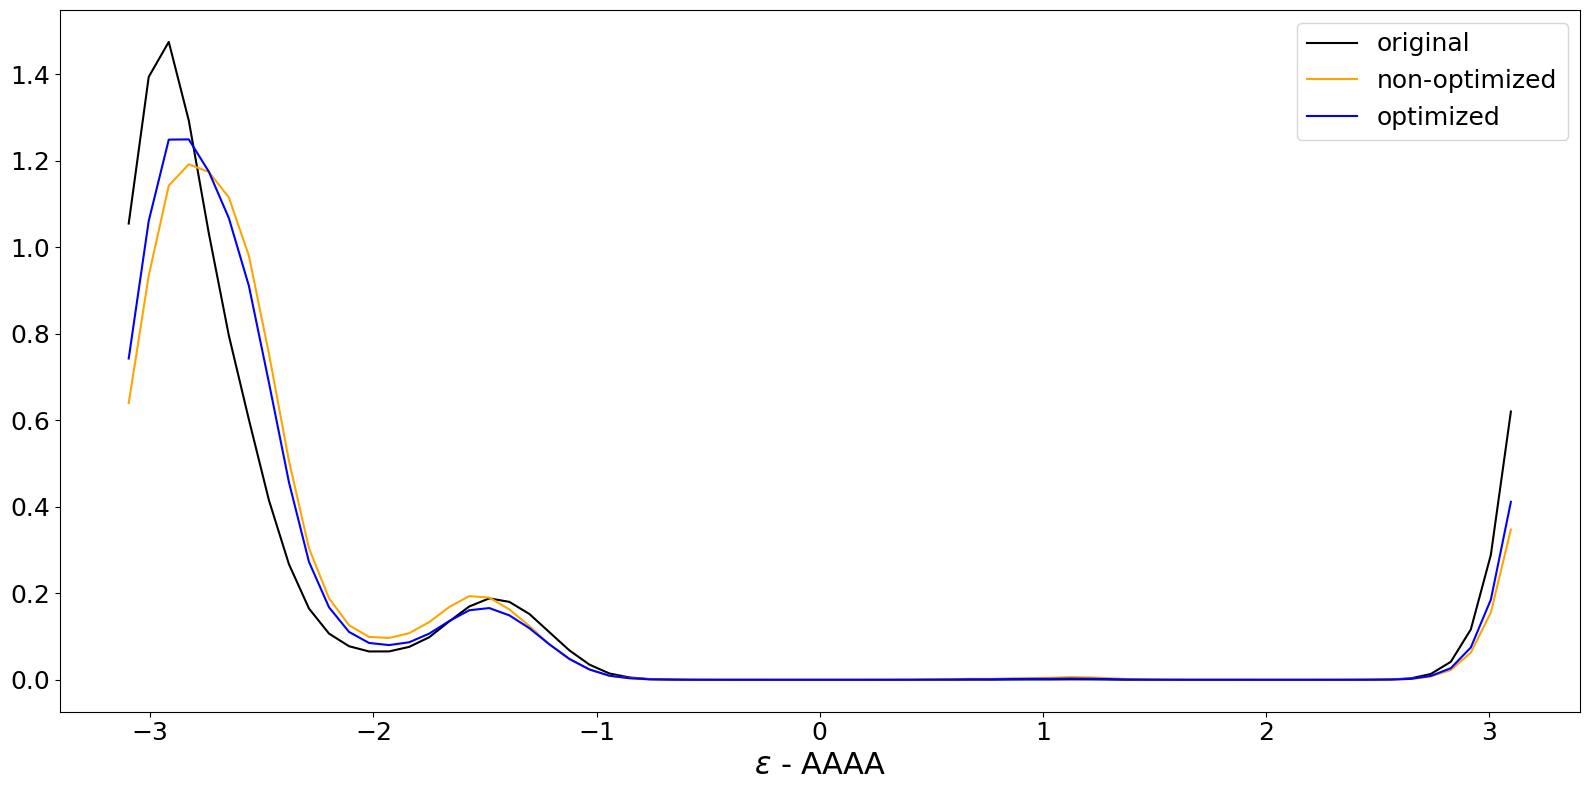

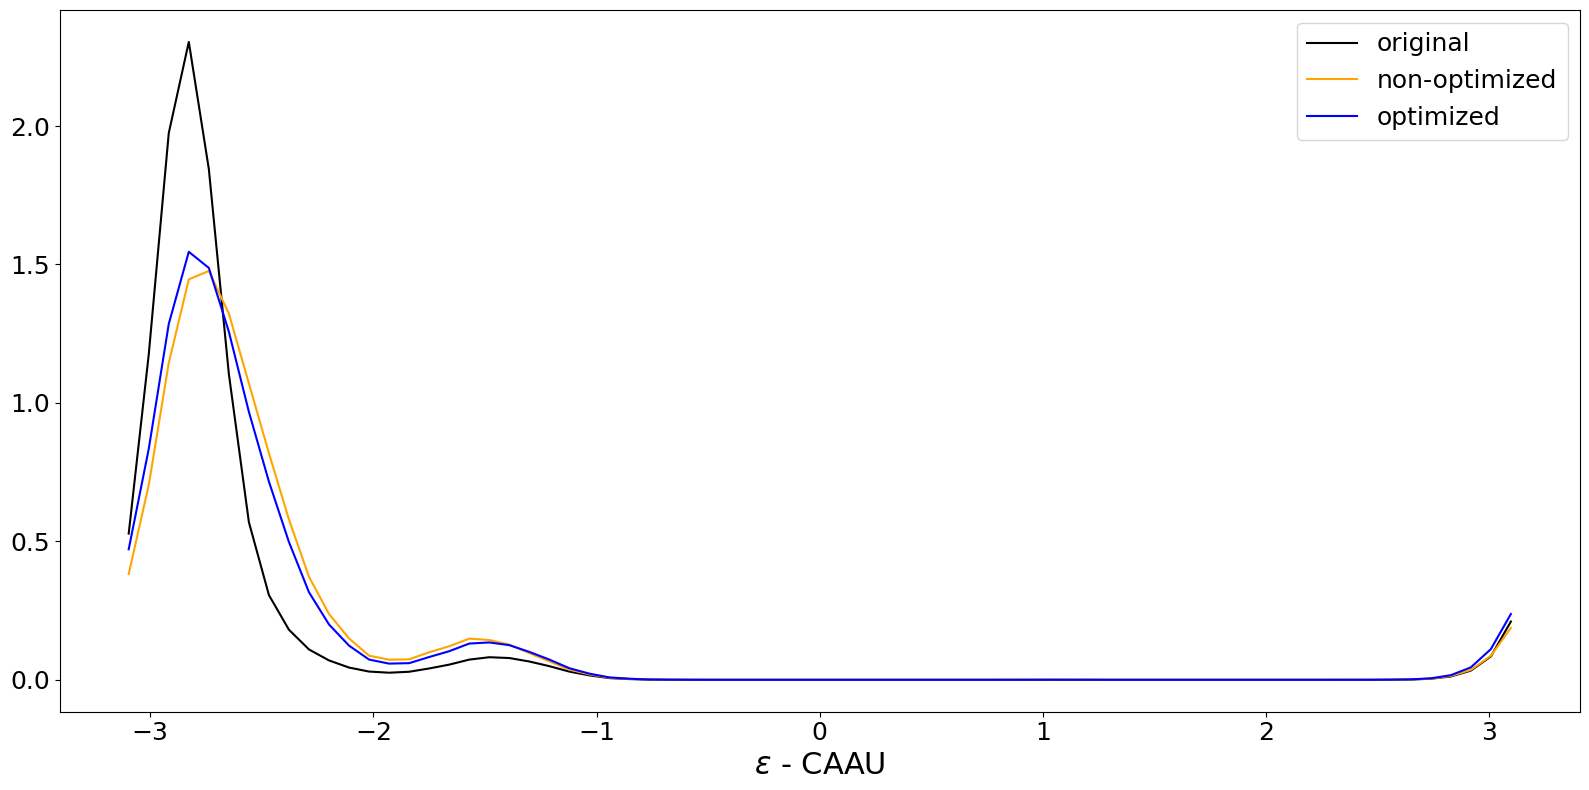

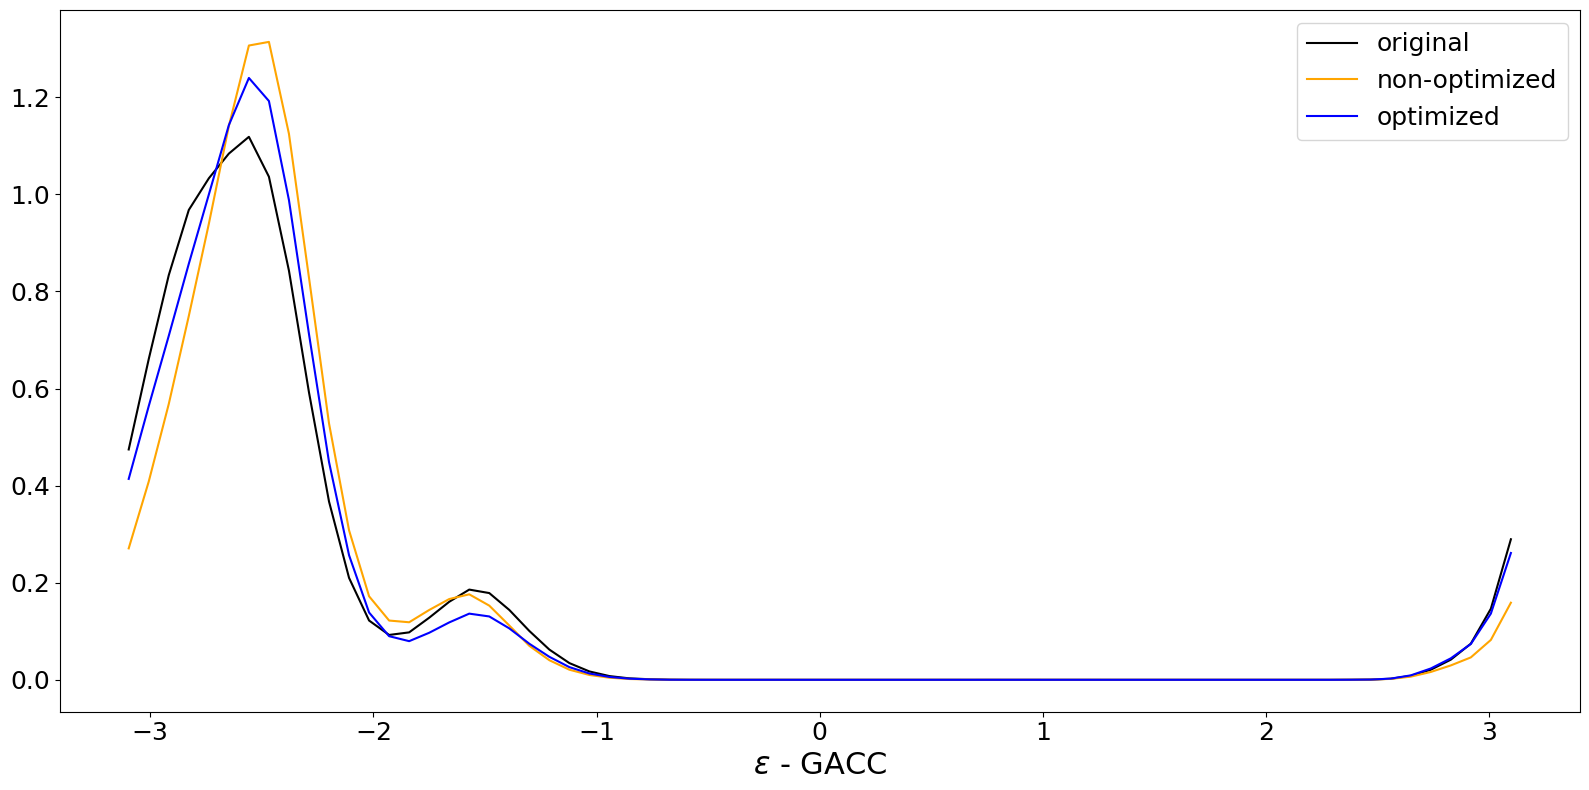

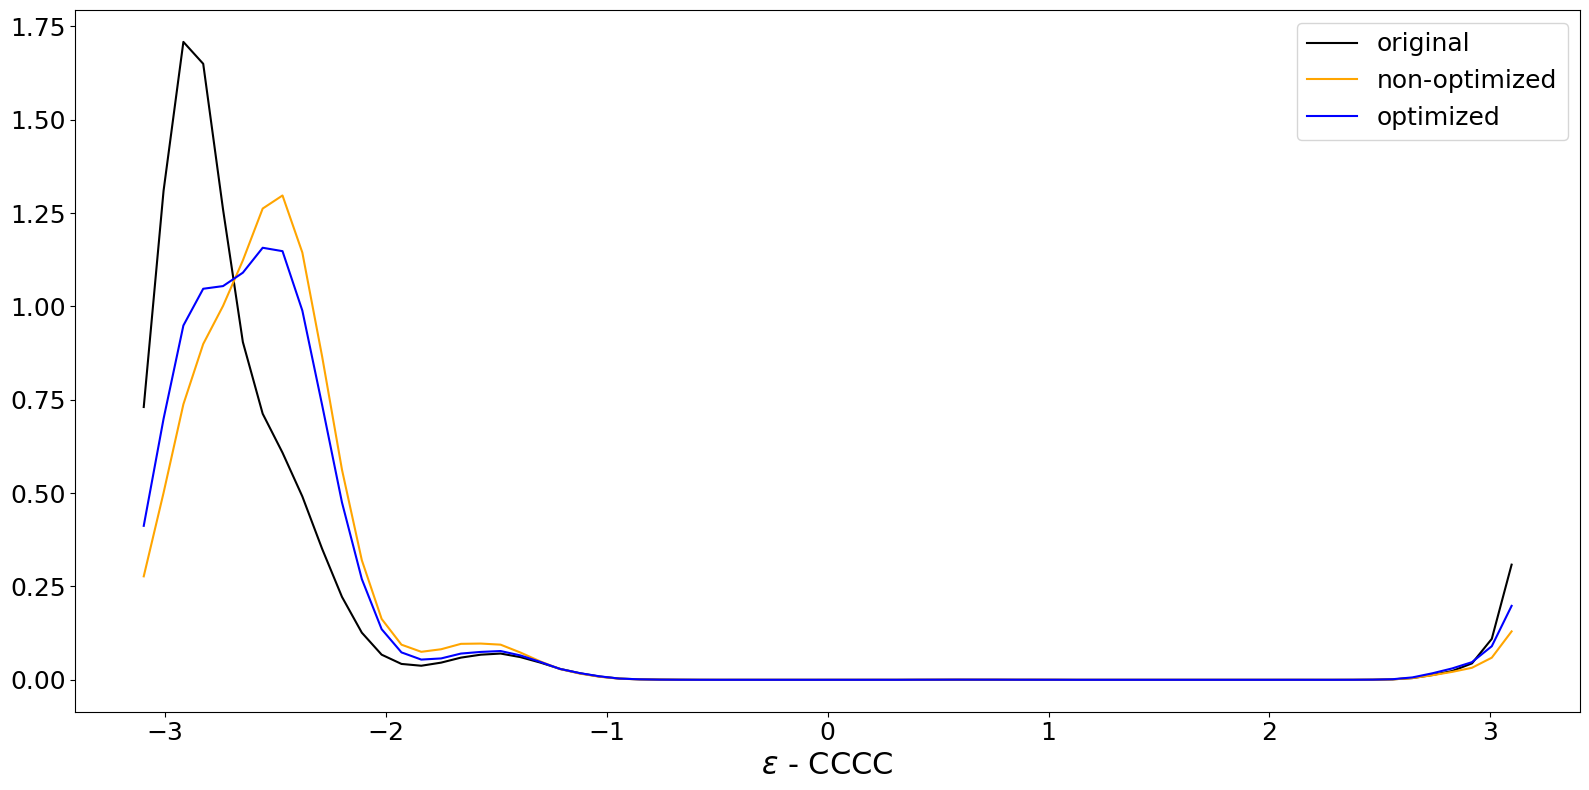

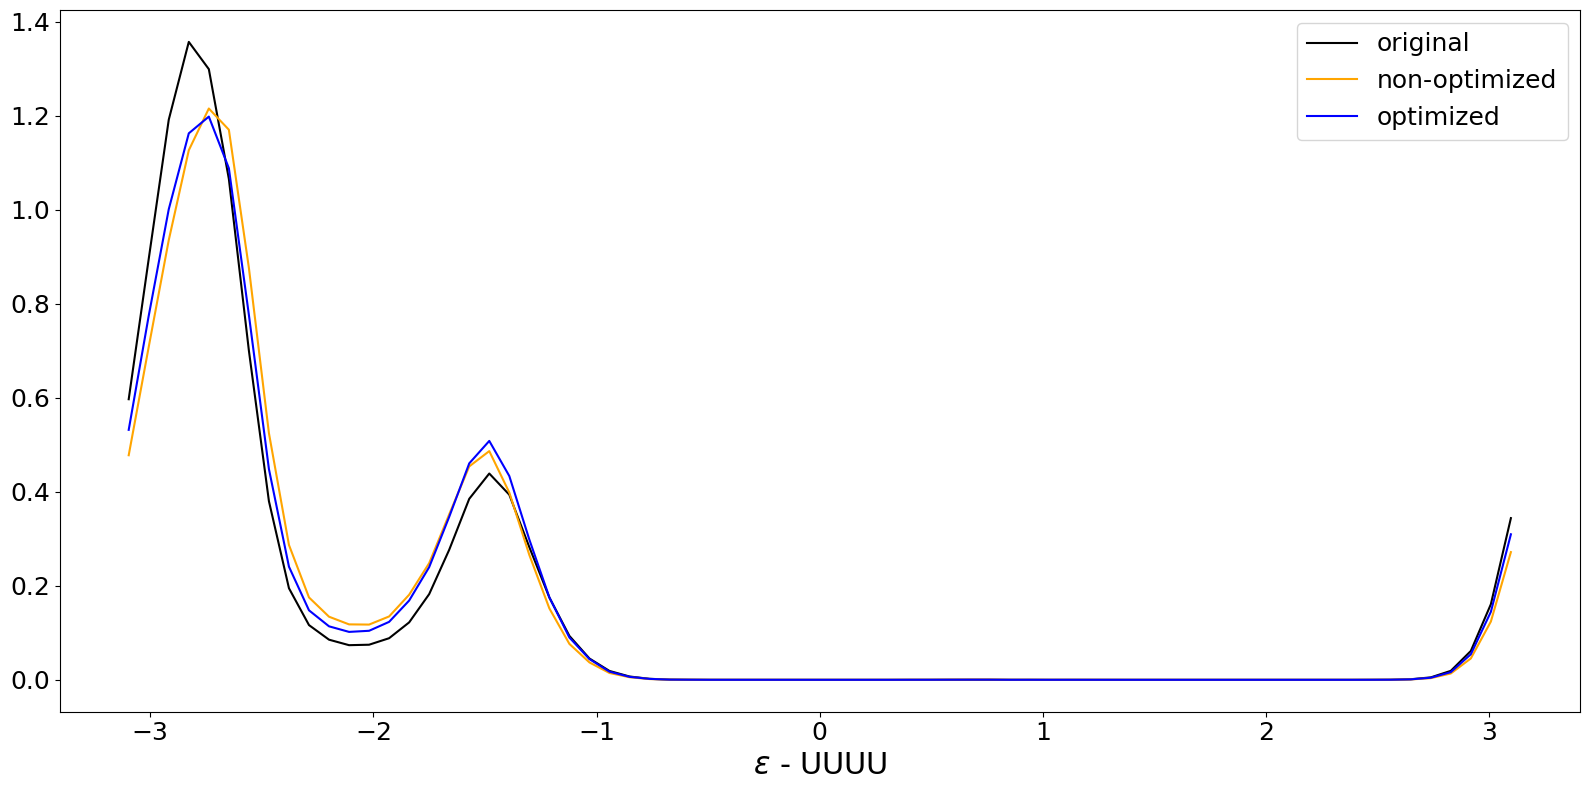

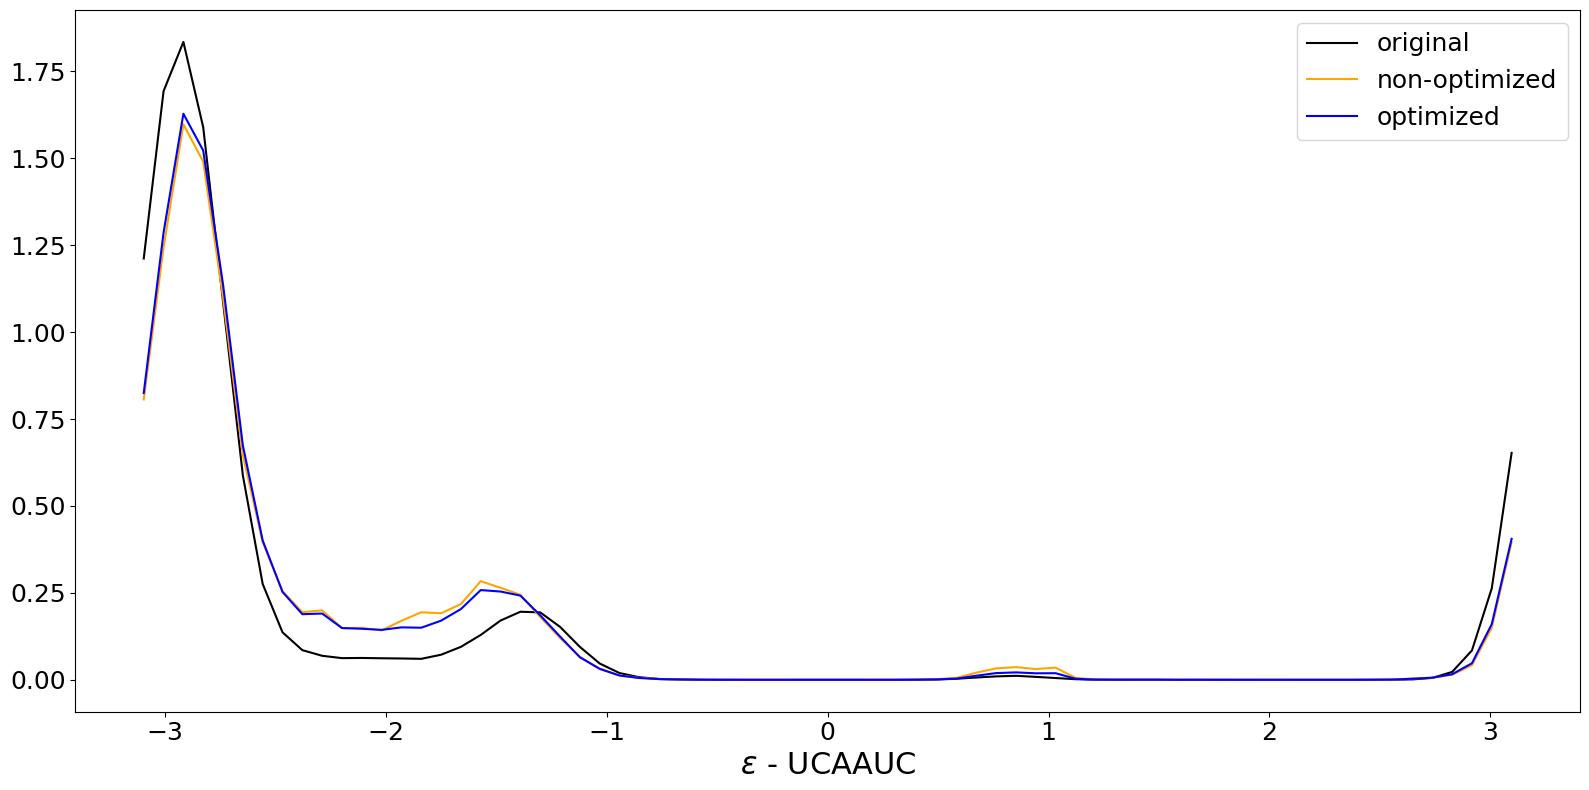

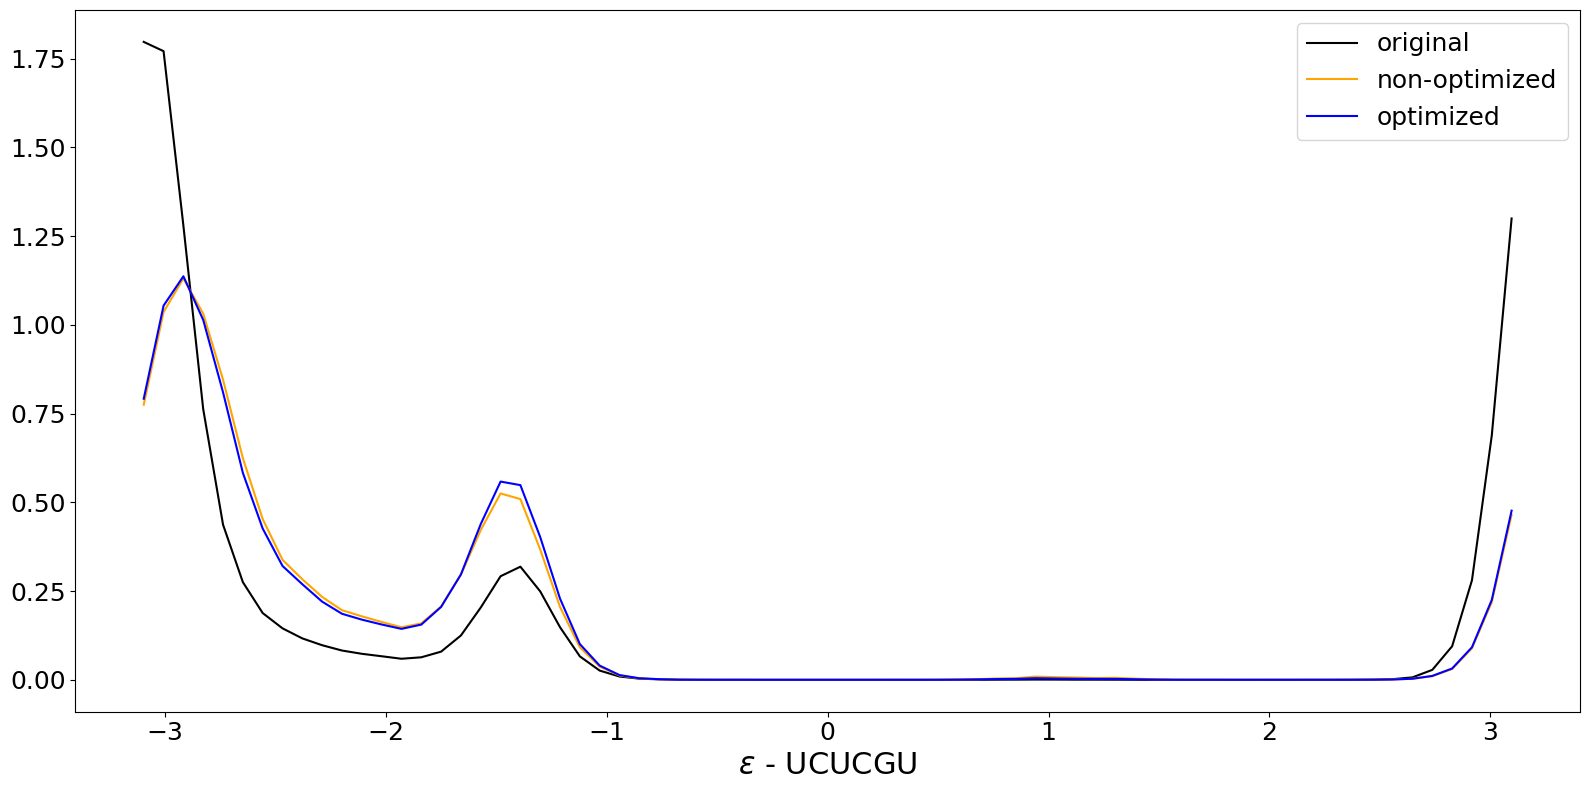

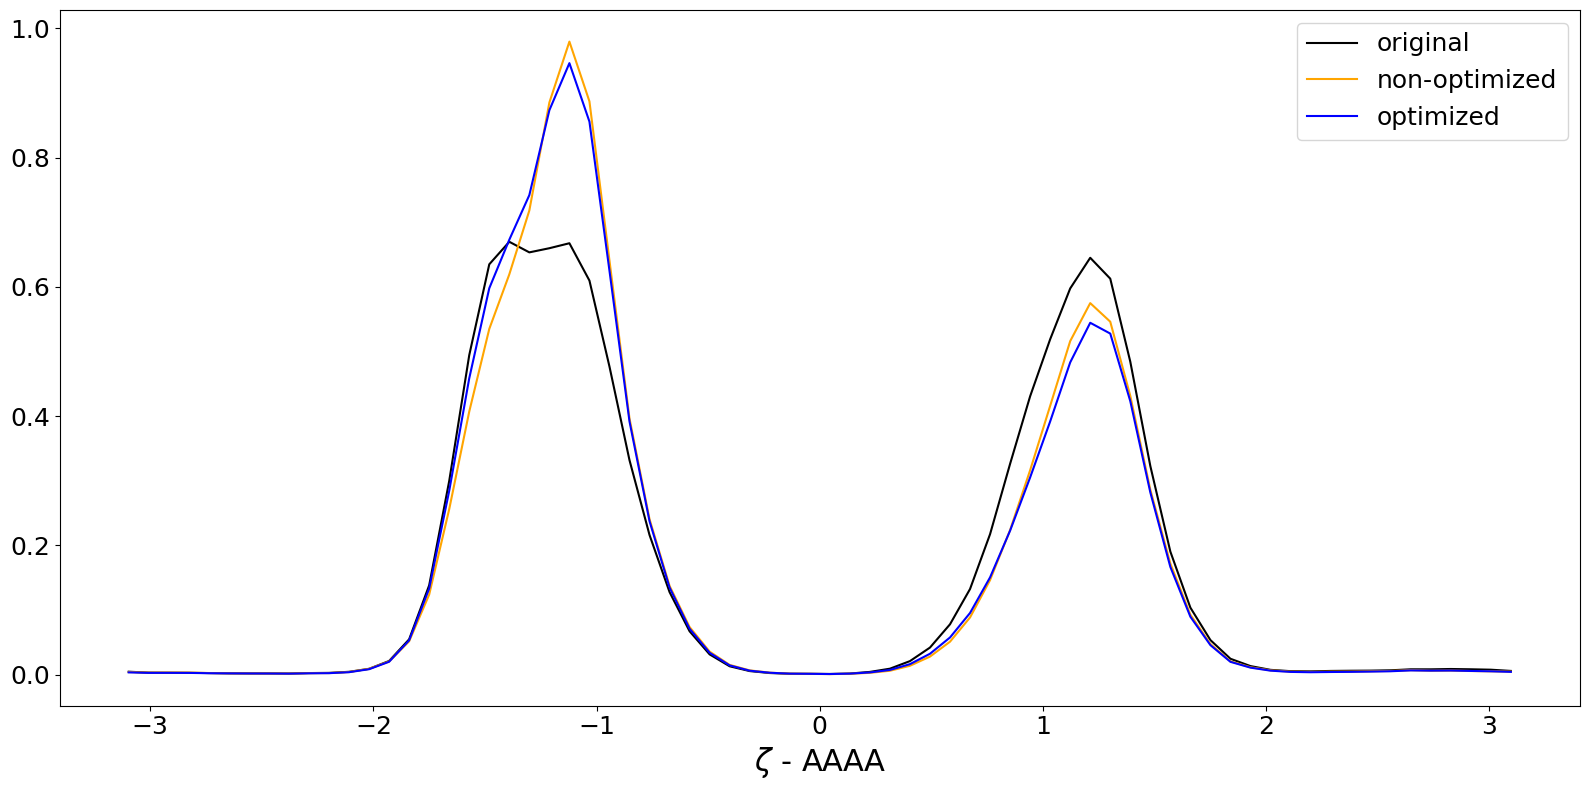

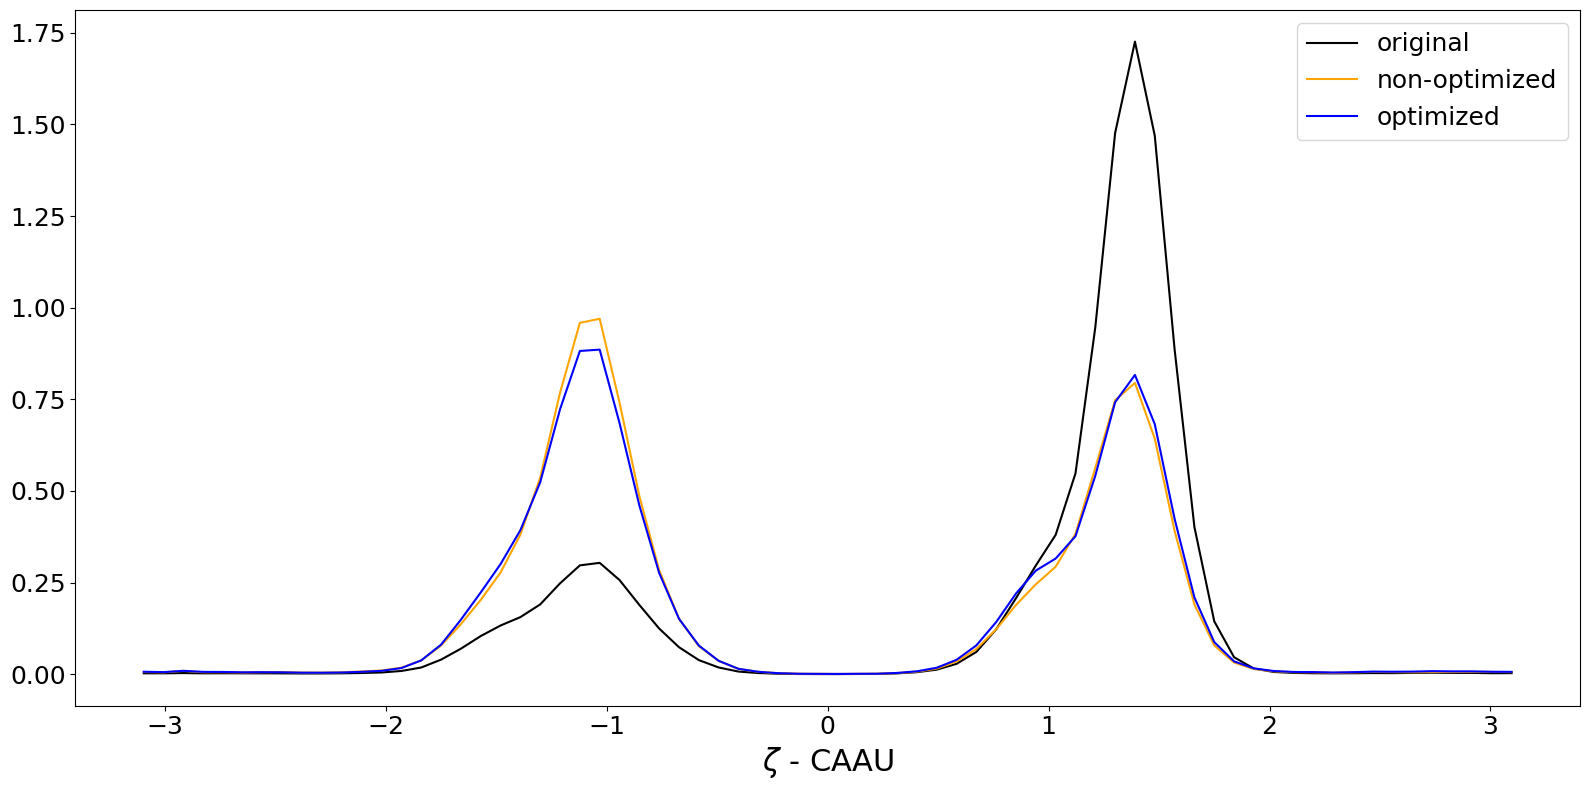

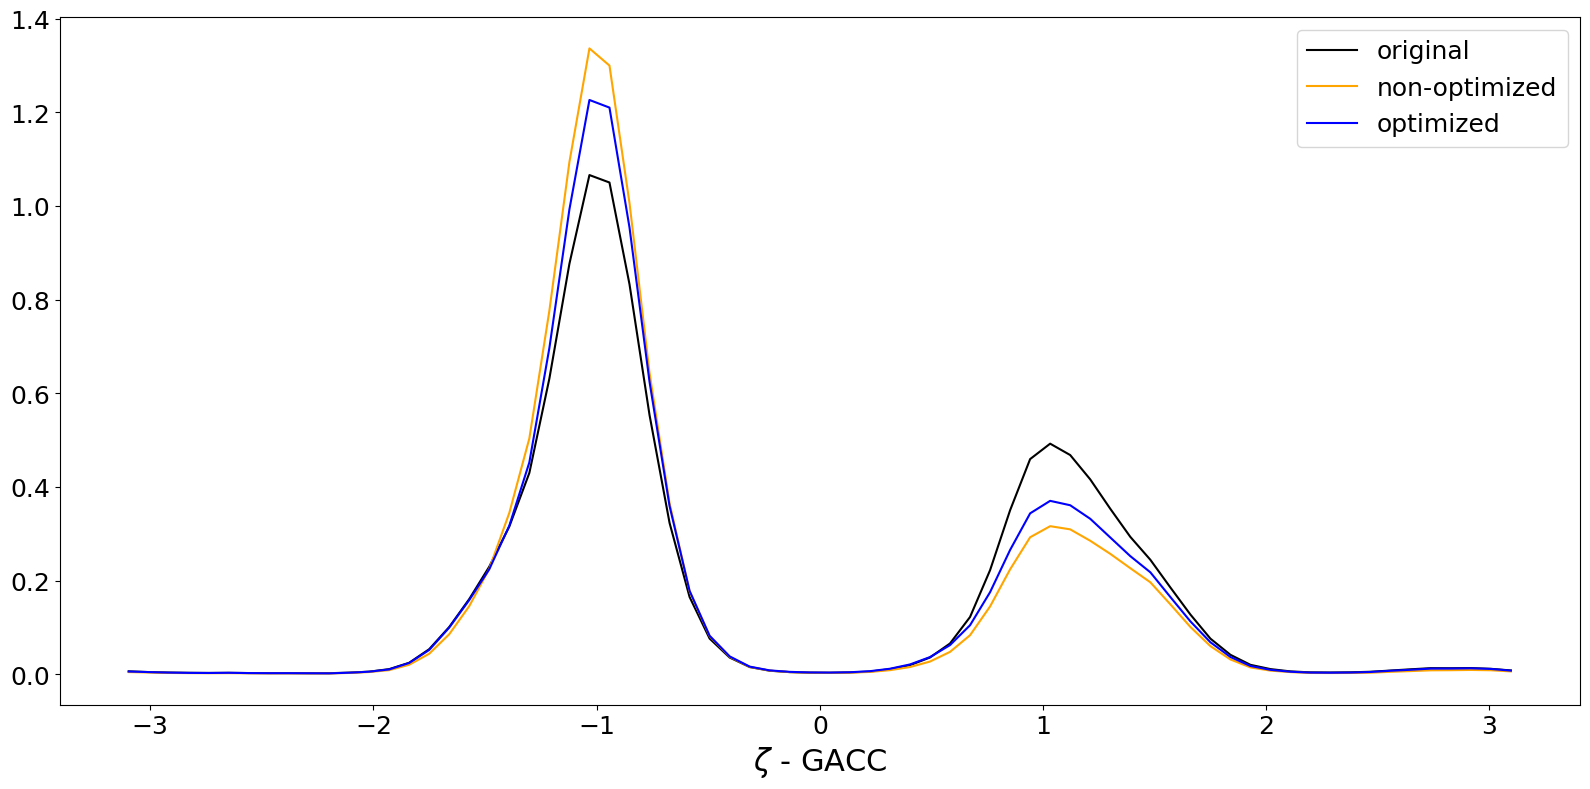

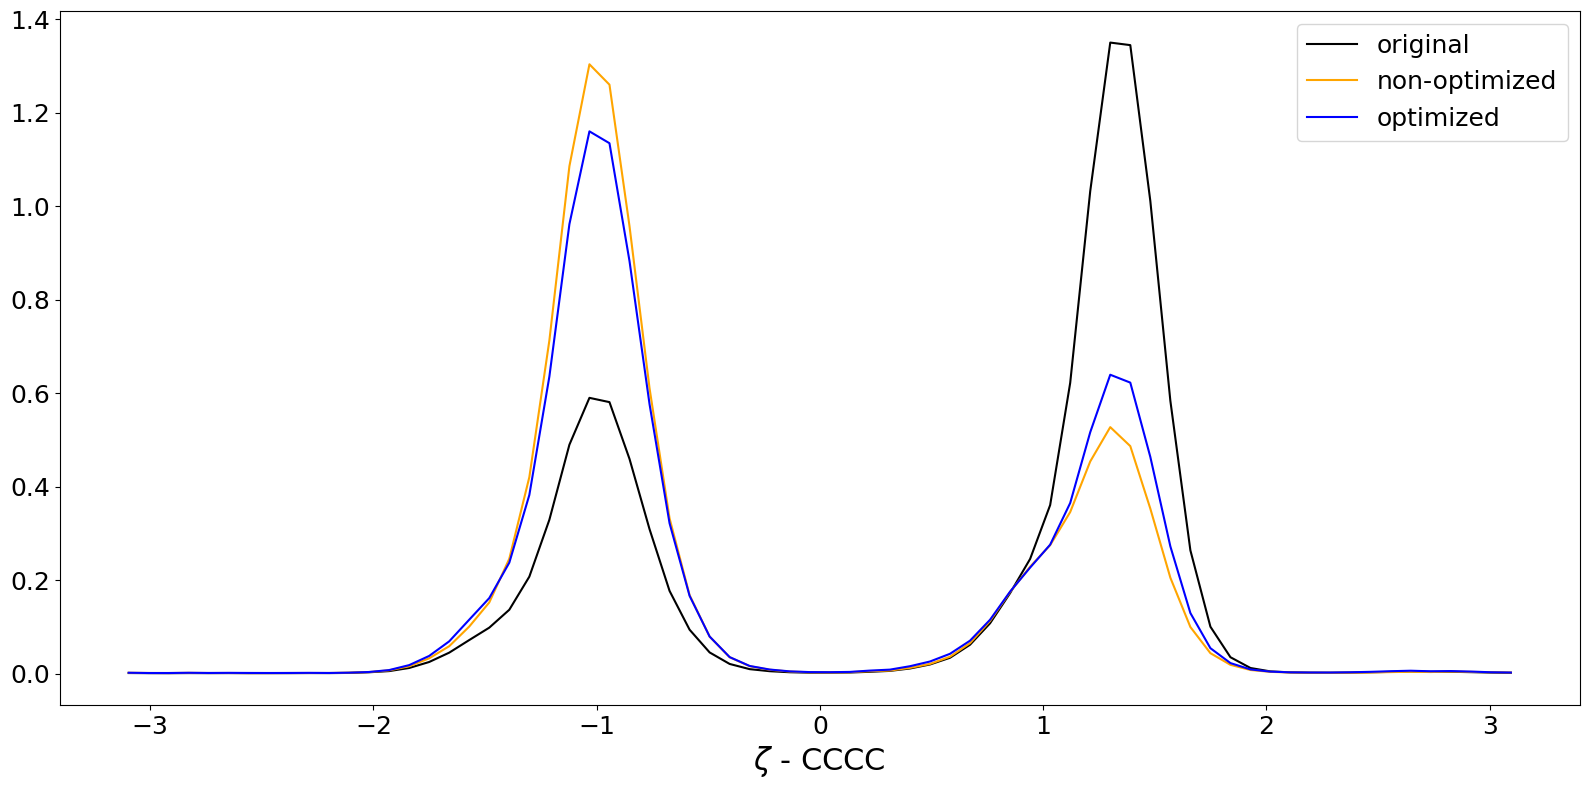

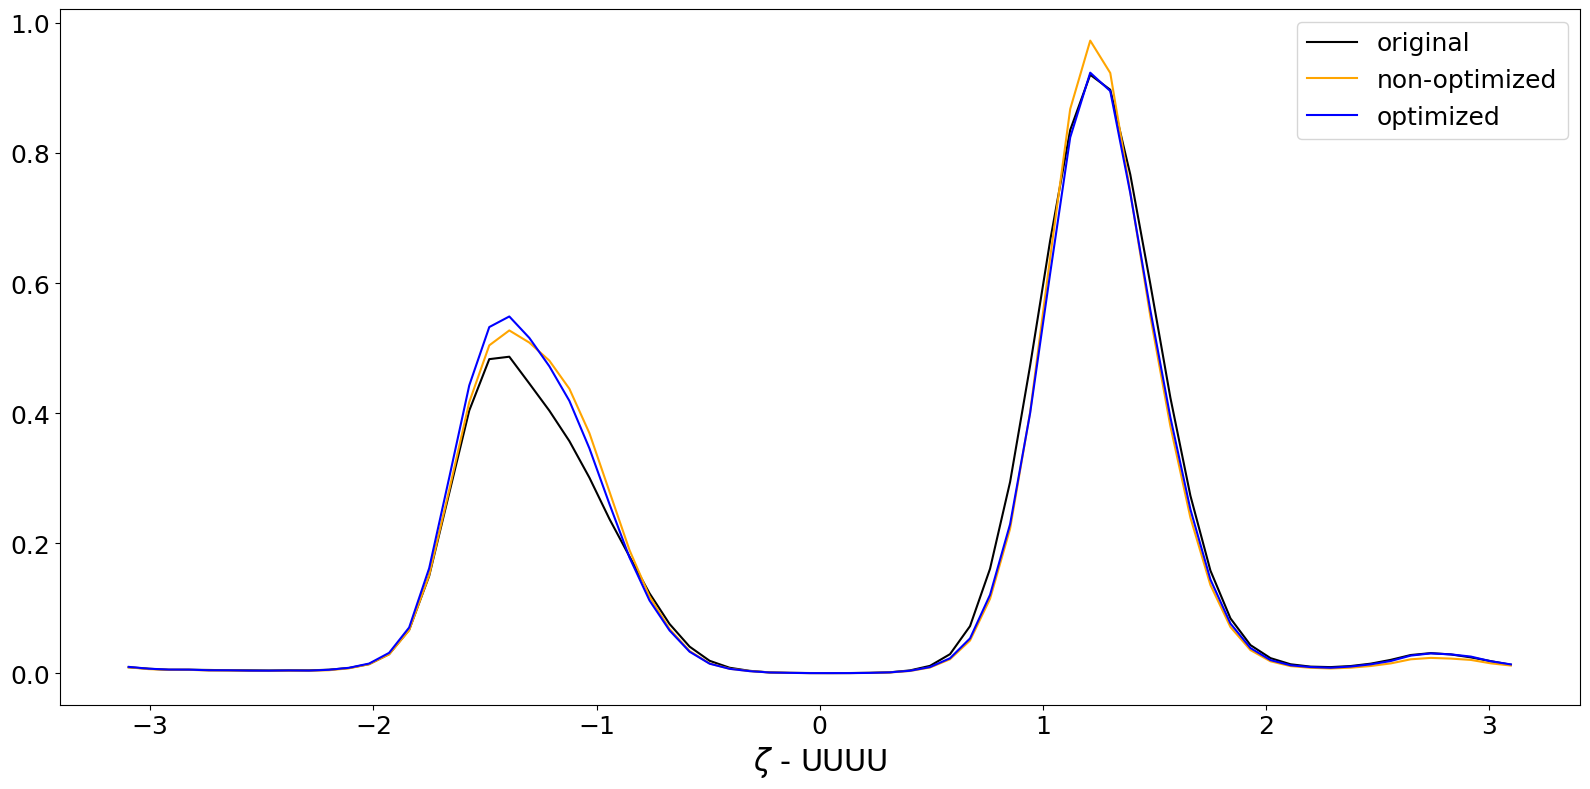

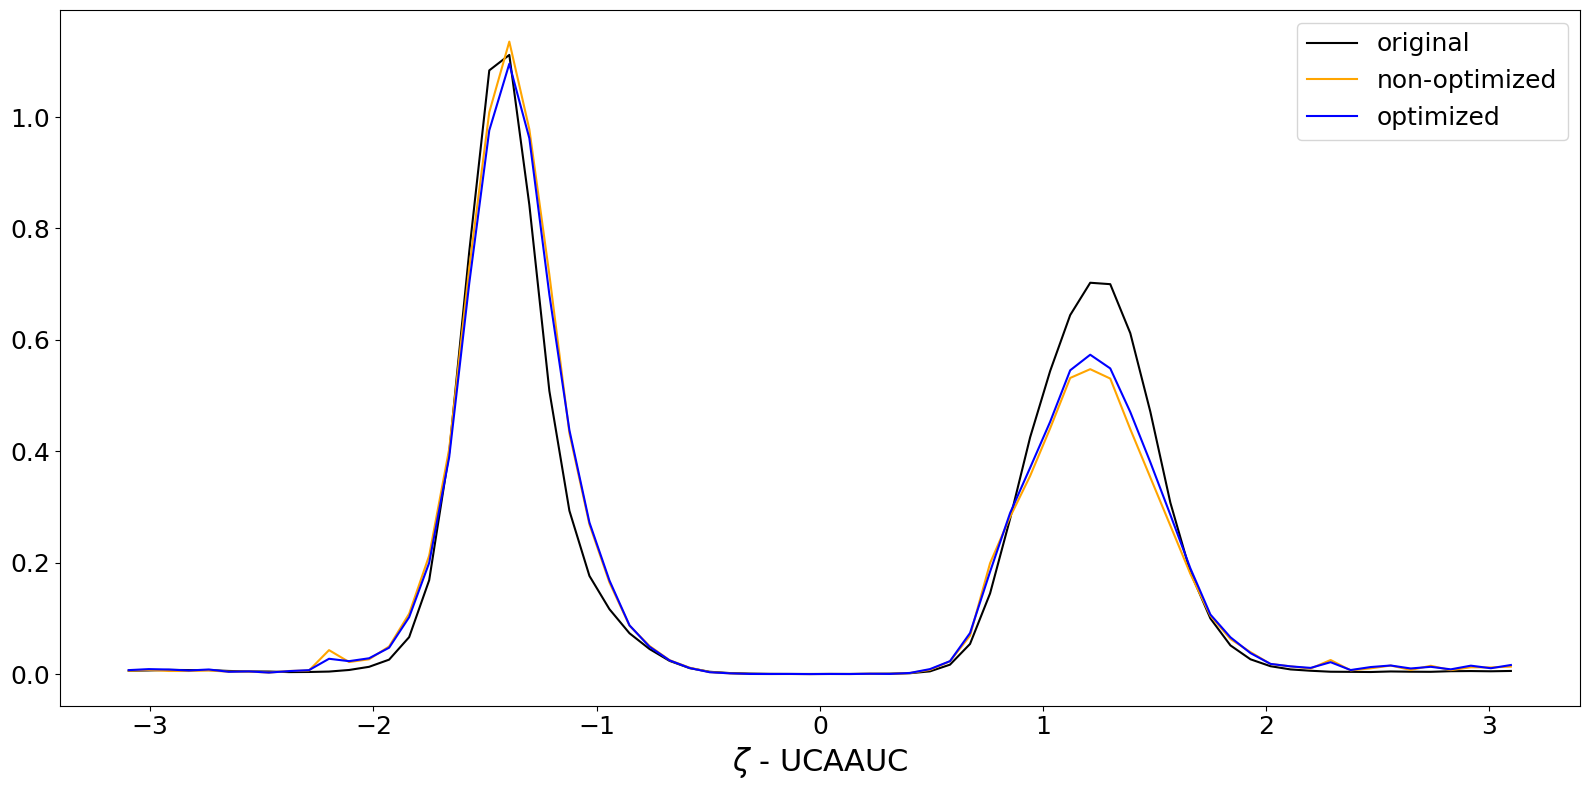

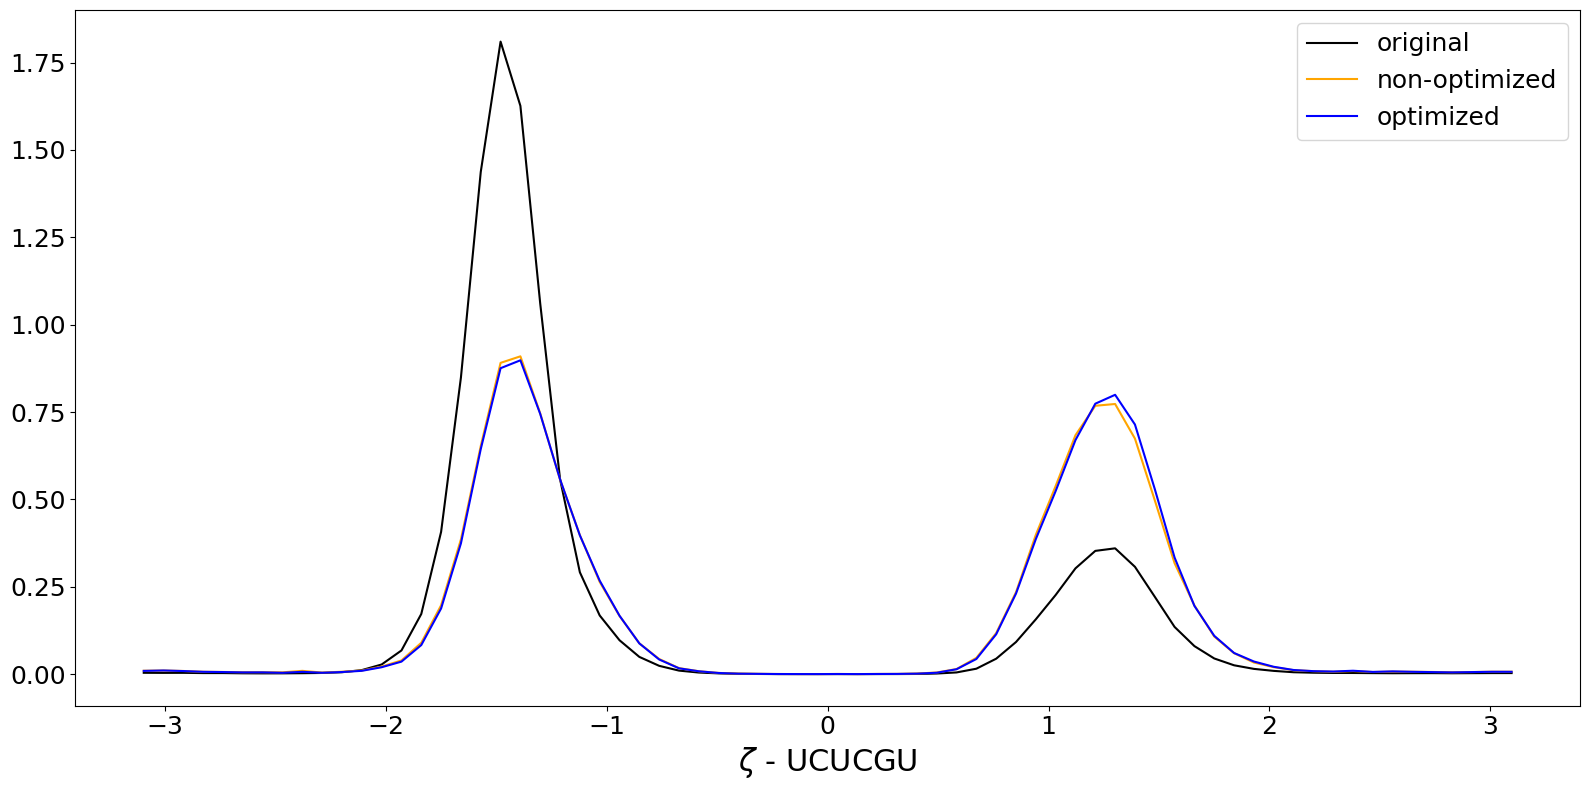

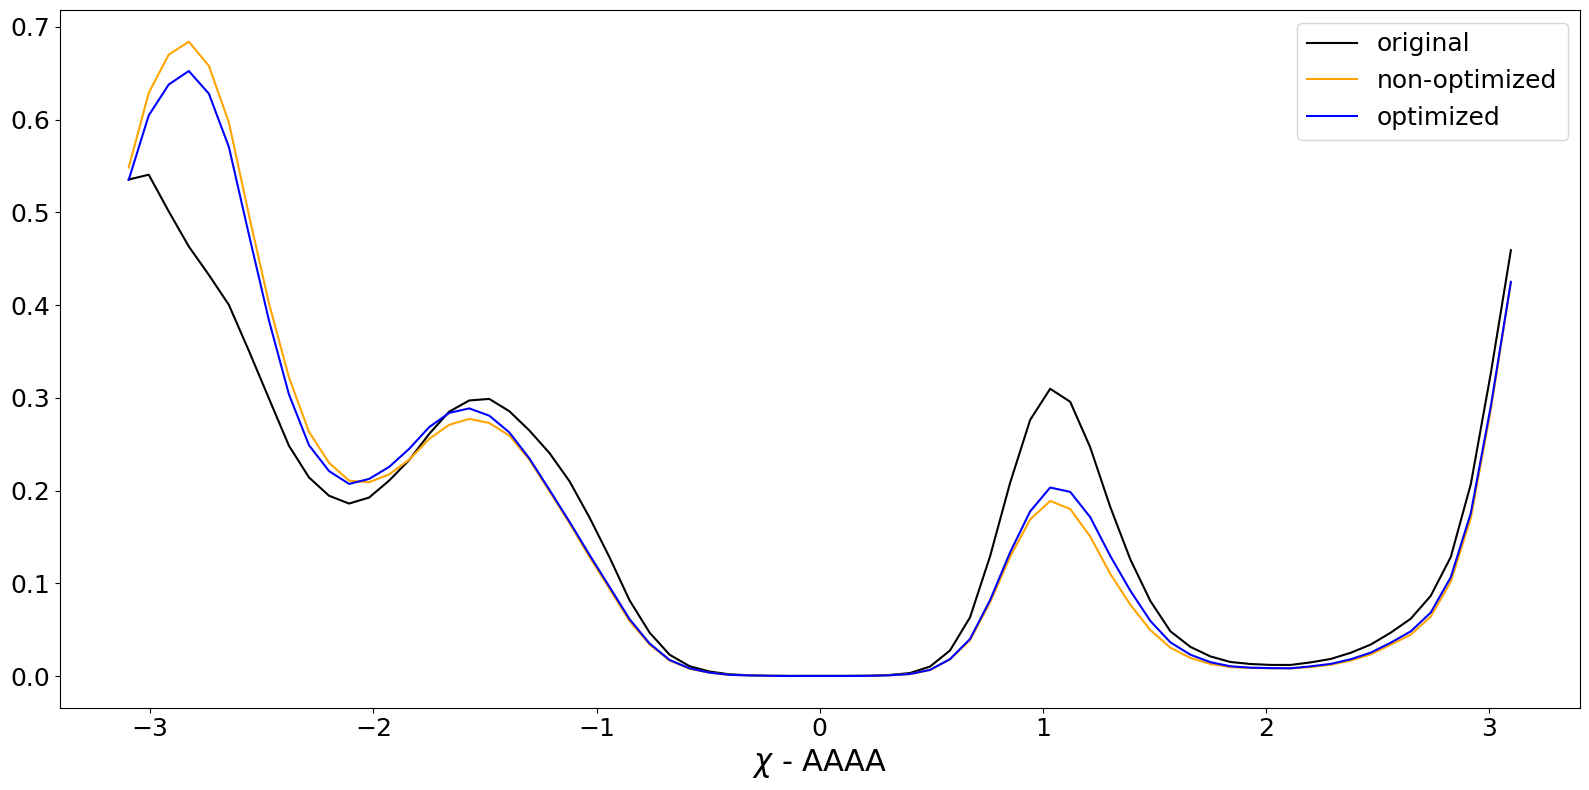

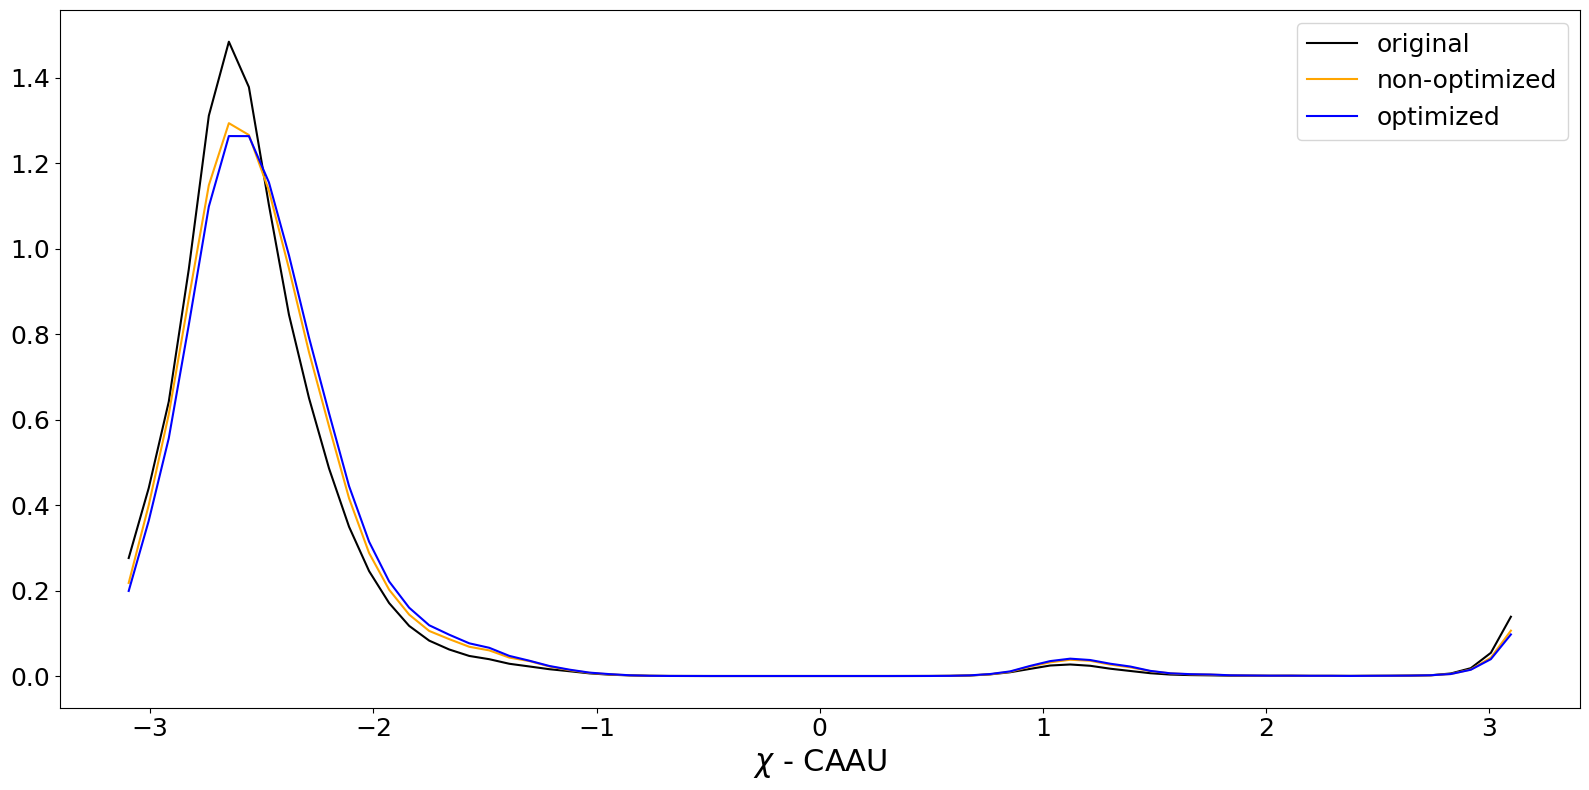

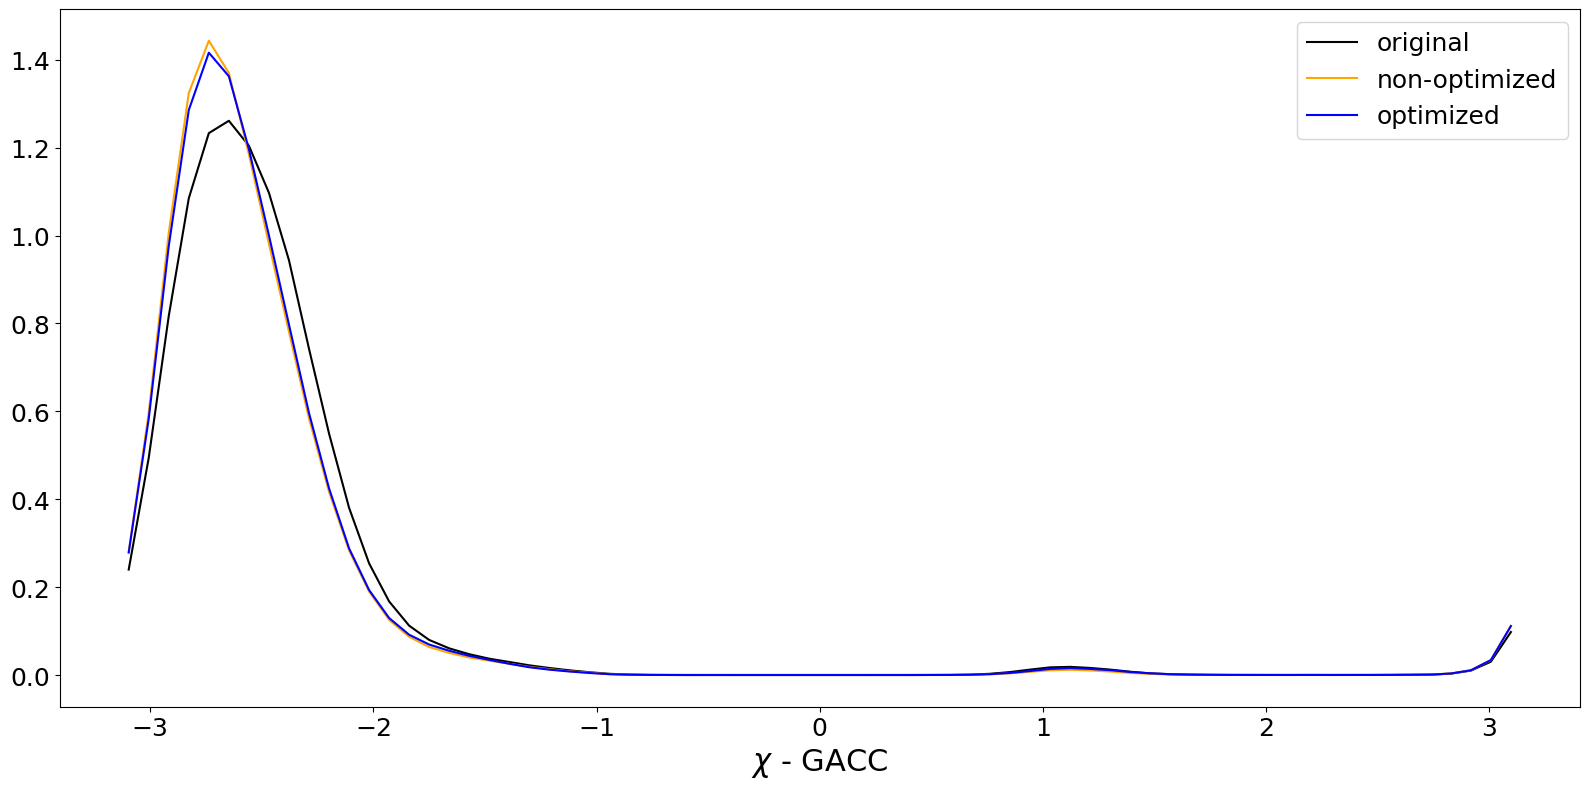

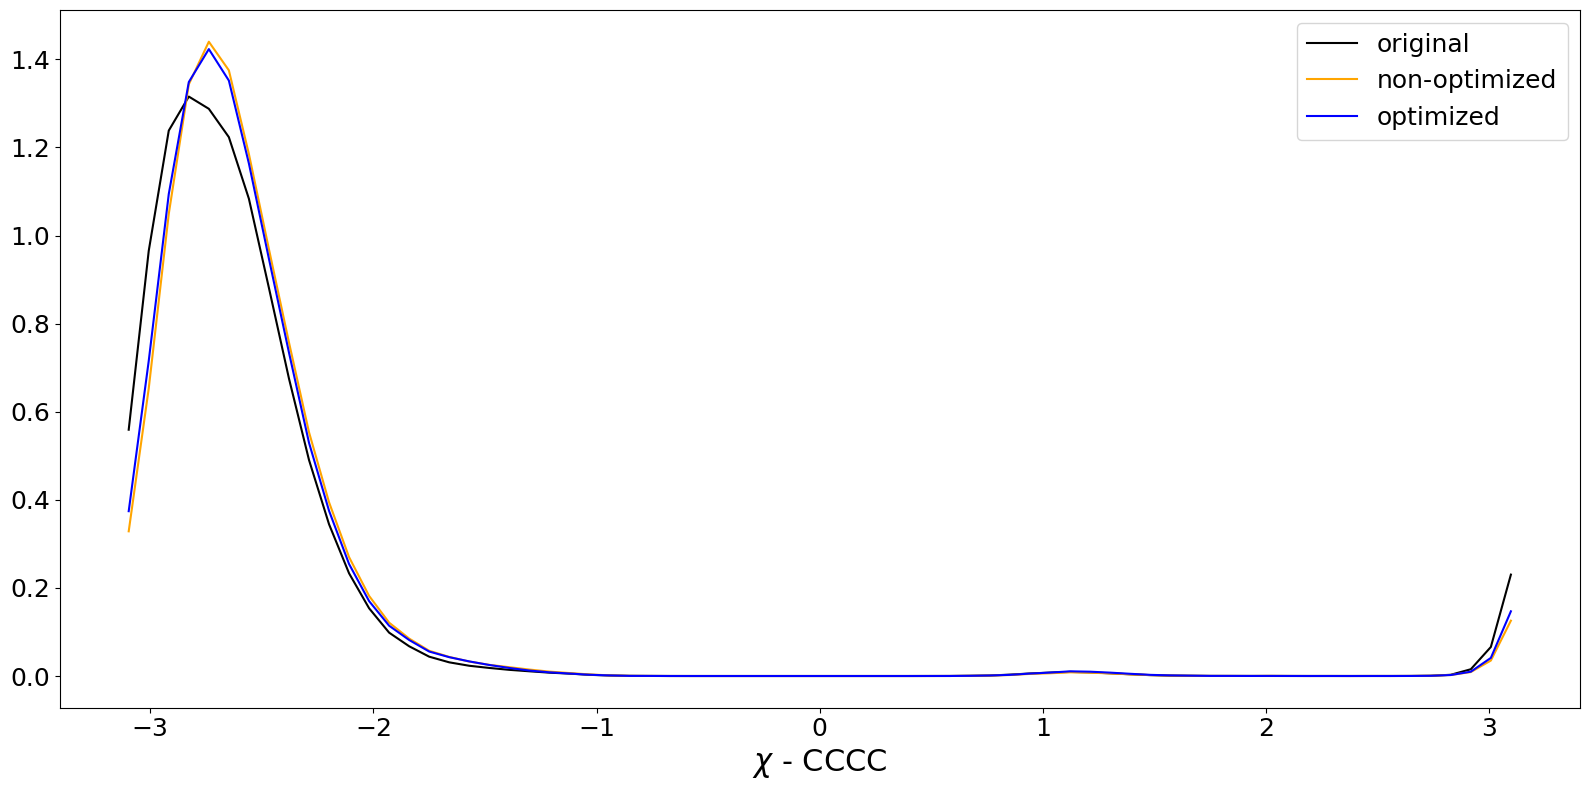

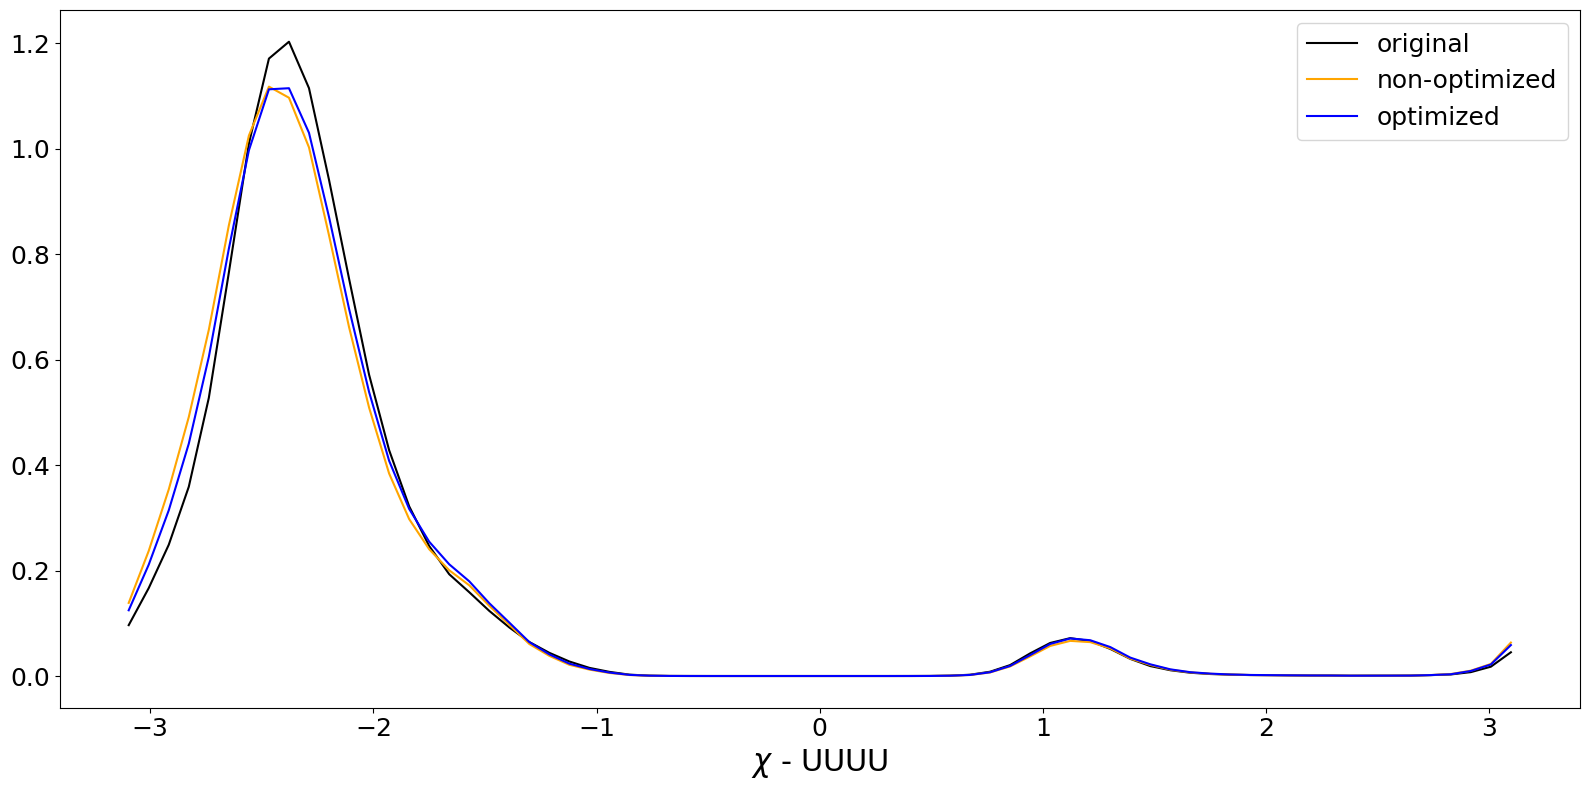

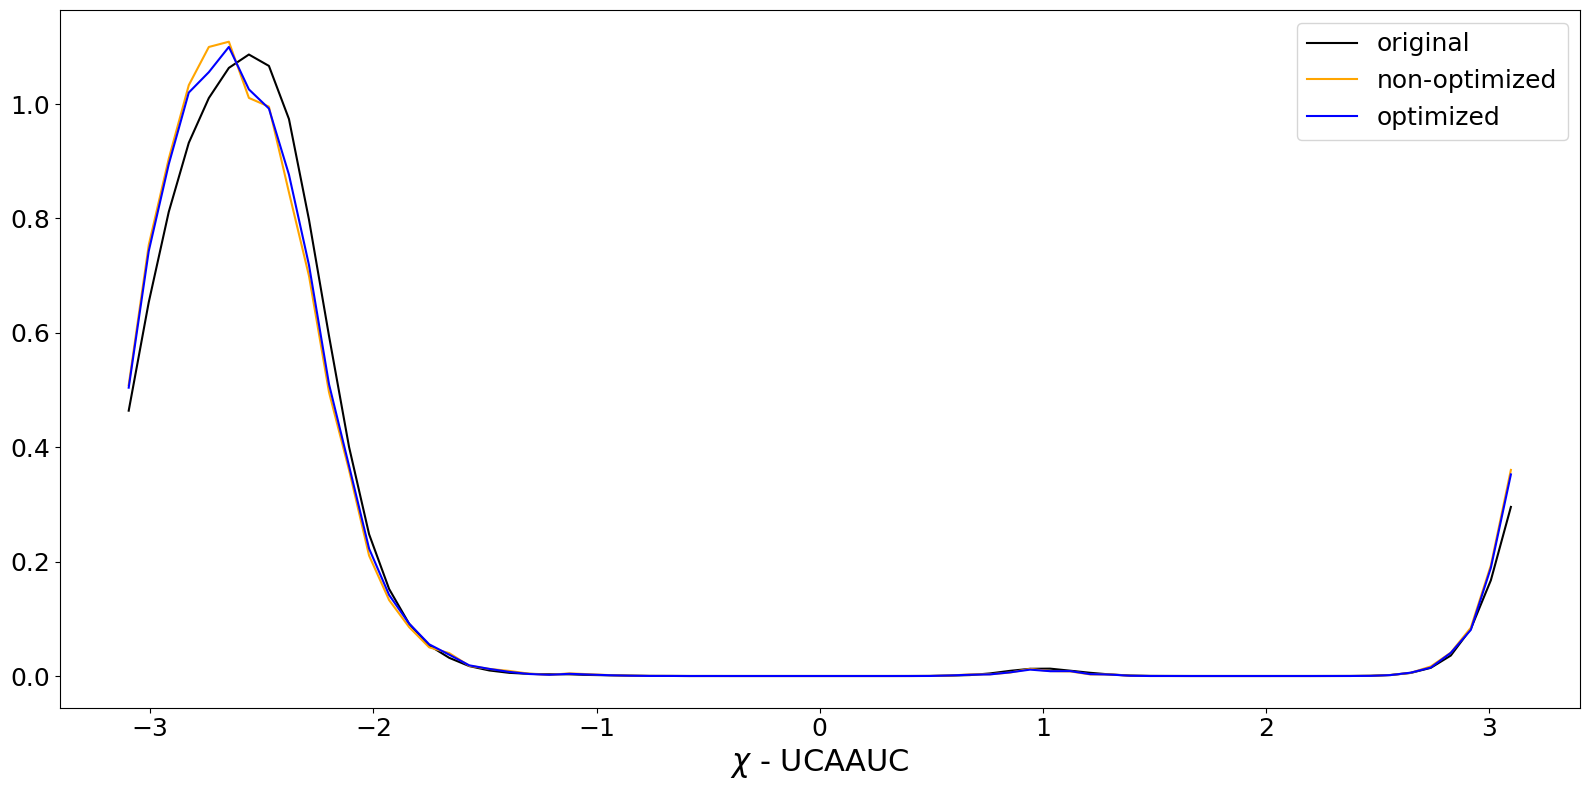

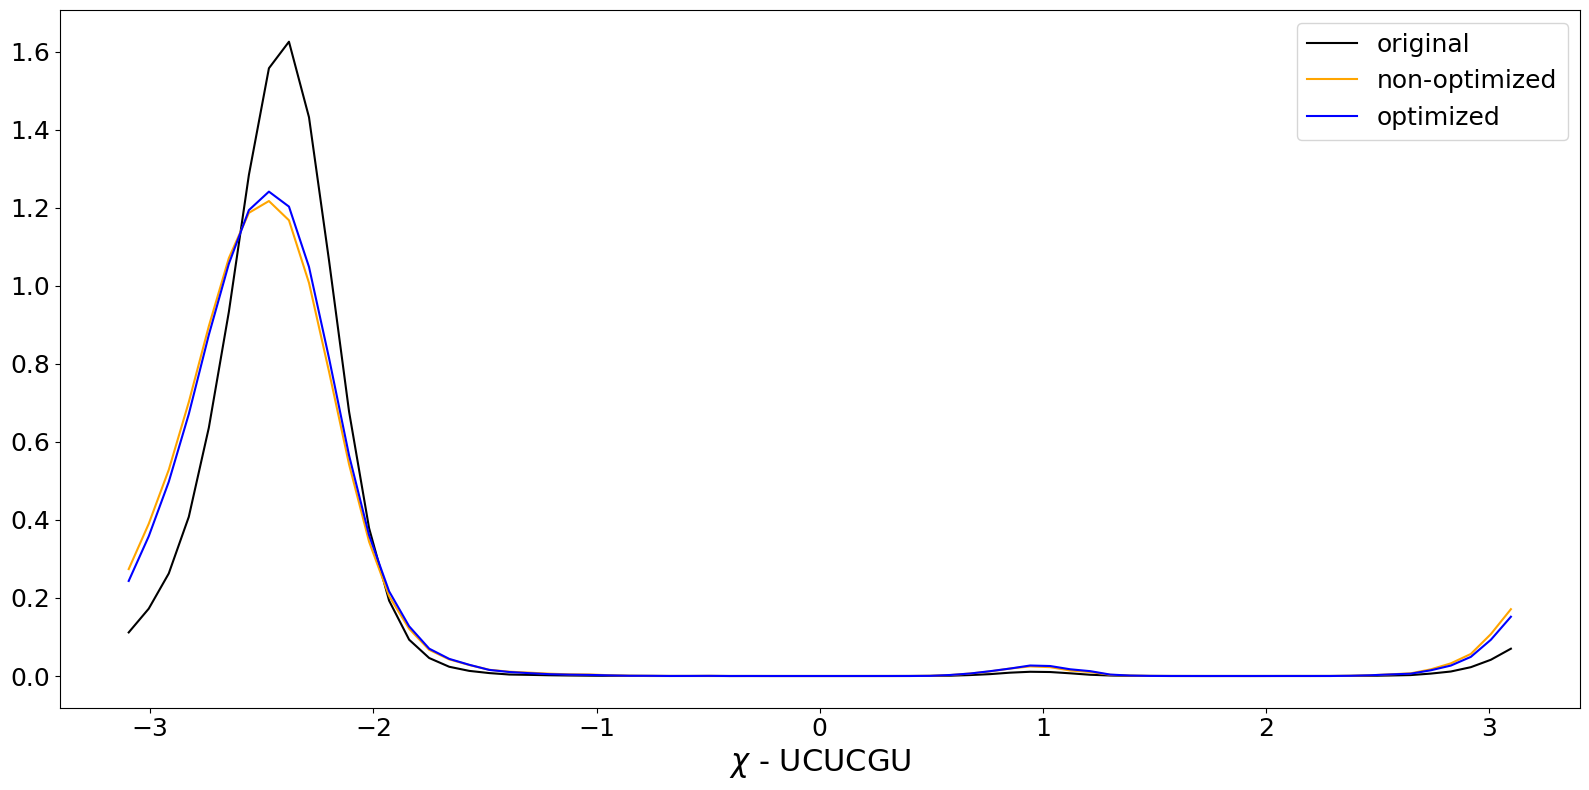

In [6]:
#iterate over all angles and all systems seperately, then average over all nucleotides available


bin_size=70
for a,angle in enumerate(angle_list):
    for s,Sequence in enumerate(Sequences):
        
        sel_angle=angles[s][:,:,a]
        
        c=0
        for n in range(sel_angle.shape[1]):
            
            
            temp_angle=sel_angle[:,n]
            
            if np.isnan(np.sum(temp_angle)):
                continue
            else:
                
                if c==0:
                    col_angle=temp_angle
                    weights_temp=new_weights[s,:]
                    weights_non_temp=new_weights_inf[s,:]
                else:
                    angle=np.hstack((col_angle,temp_angle))
                    weights_temp=np.hstack((weights_temp,new_weights[s,:]))
                    weights_non_temp=np.hstack((weights_non_temp,new_weights_inf[s,:]))
                    c+=1
    
                    
                
        c_orig_hh,orig_ee = np.histogram(col_angle,density=True,bins=bin_size)
        c_new_hh,new_ee = np.histogram(col_angle,weights=weights_temp,density=True,bins=bin_size)
        c_non_hh,non_ee = np.histogram(col_angle,weights=weights_non_temp,density=True,bins=bin_size)

        
        plt.figure(figsize=frame)
        plt.plot(0.5*(orig_ee[1:]+orig_ee[:-1]),c_orig_hh,color='black',label='original')
        plt.plot(0.5*(non_ee[1:]+non_ee[:-1]),c_non_hh,color='orange',label='non-optimized')
        plt.plot(0.5*(new_ee[1:]+new_ee[:-1]),c_new_hh,color='blue',label='optimized')
        plt.legend(fontsize=18)
        plt.xlabel(r'$\%s$ - %s' %(angle,Sequence),fontsize=22)
        plt.xticks(fontsize=18)
        plt.yticks(fontsize=18)
        plt.tight_layout()
        plt.show()  

Fig. 2: Comparison of dihedral angle distributions obtained for the originally sampled ensemble and the reweighted trajectories. Reweighting using MaxEnt-methods is performed with the non-optmimized Karplus parameters and the optimized parameters obtained in this study. The dihedral angles compared include $\alpha,\beta,\gamma,\delta,\epsilon,\zeta,\chi$ and distributions are shown for each system (AAAA,CAAU,GACC,CCCC,UUUU,UCAAUC,UCUCGU) individually. For most distributions significant differences can be seen between original ensemble and the reweighted trajectories. In few cases (e.g. $\alpha$-CCCC/GACC, $\delta$-UUUU/UCAAUC/UCUCGU and $\zeta$-CCCC) also the non-optimized Karplus parameters result in different distributions after reweighting compared to reweighting with the optimized parameters.